In [1]:
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
import geopandas as gp

%matplotlib inline
plt.style.use('ggplot')

In [2]:
sb.set_style("whitegrid")
plt.rcParams["ytick.labelsize"] = 13
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["grid.linewidth"] = 2.0
plt.rcParams["axes.edgecolor"] = "0.15"
plt.rcParams["axes.linewidth"]  = 1.1
plt.rcParams["legend.frameon"] = True
plt.rcParams["legend.framealpha"]= 0.9
plt.rcParams["legend.edgecolor"] = "black"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["figure.titlesize"] = 18
plt.rcParams["figure.dpi"] = 150
plt.rcParams["figure.autolayout"] = False


In [3]:
priority_deptos = [ 5, 12, 10, 9, 11, 18, 19 ]

In [4]:
datadf = pd.read_csv(\
     "../../../../Outcome Measurement Data/TUBERCULOSIS/GTM - Tx cohort data 2012-2016.csv", index_col = 0)

deptos = gp.read_file("../../../../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Departamentos.geojson")

In [5]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[#(datadf.row_name_.isin(["FALLECIDOS"])) & 
              (datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"
                          ])) &
       (datadf.deptocode!=0)].\
    groupby(["year"]).value.sum()
#temp["total"] = temp.sum(axis=1)
#temp = temp.fillna(0)
#temp = \
#    (np.round(temp.divide(temp.total , axis="rows")*100, decimals=0)).astype(int).astype(str) + "%"
temp

year
2012    3647.0
2013    3472.0
2014    3262.0
2015    3449.0
2016    3286.0
Name: value, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


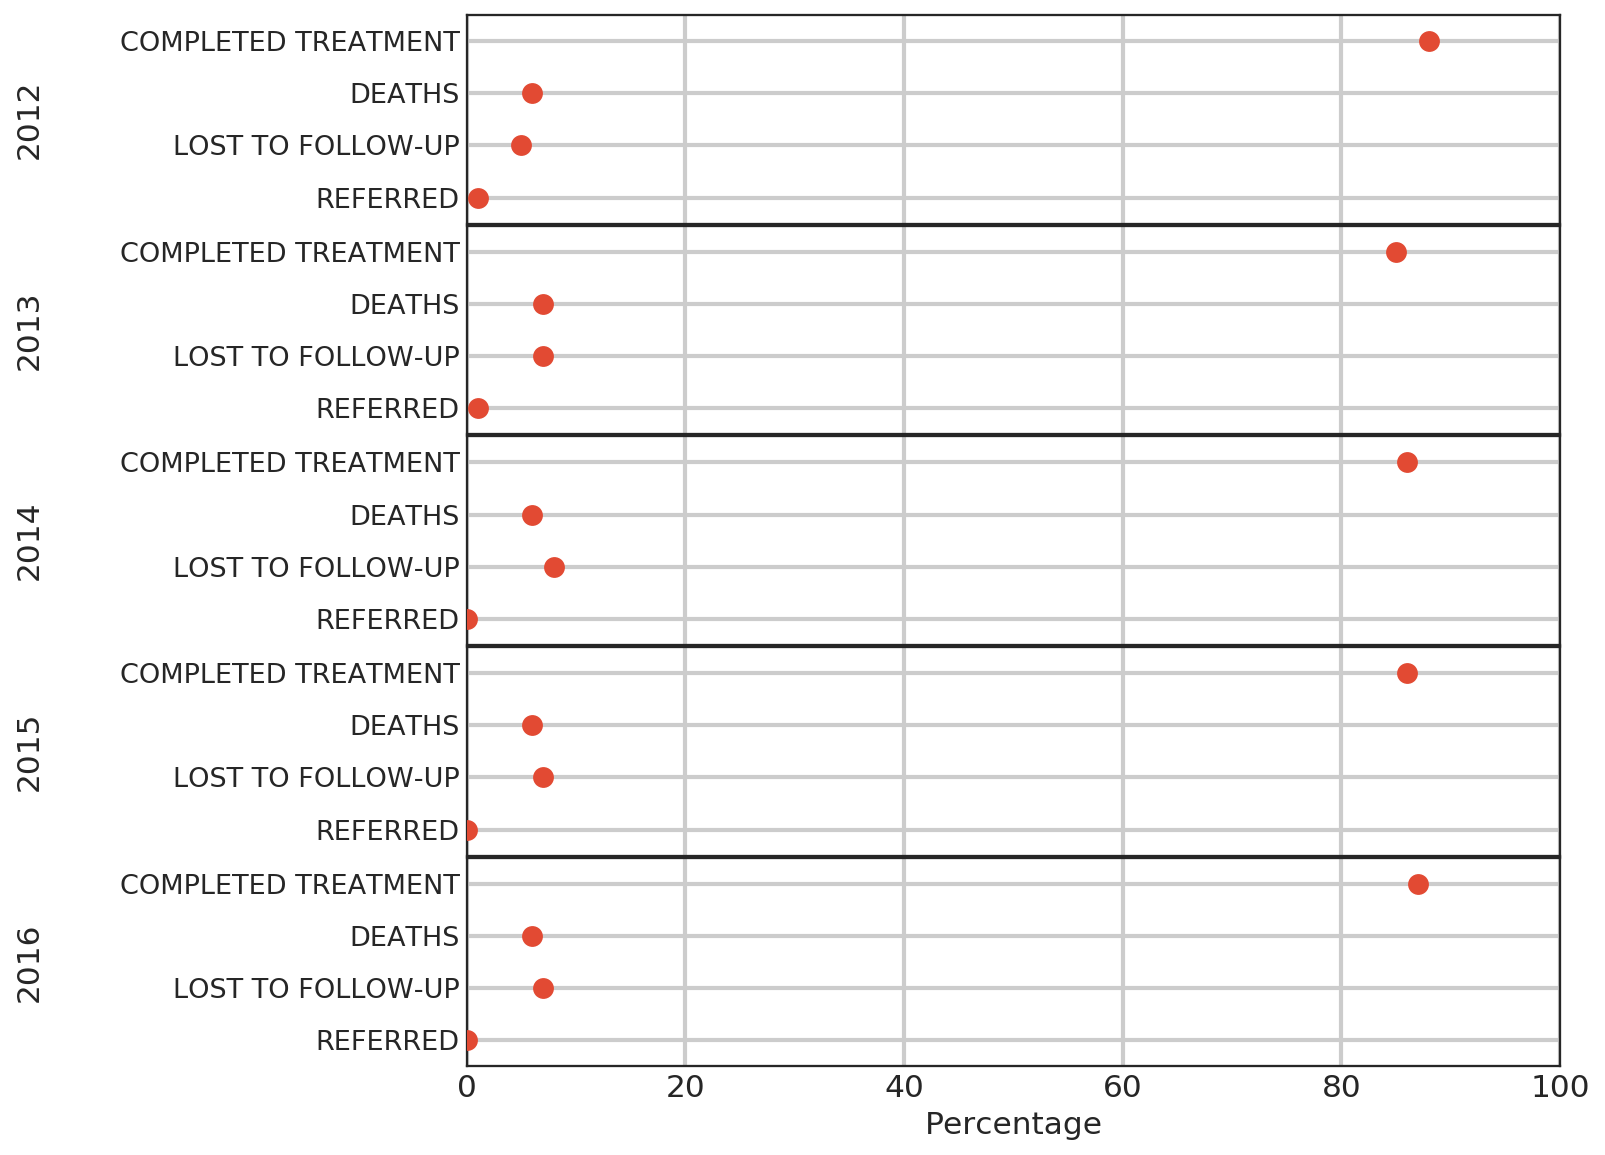

In [6]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "row_name_B"]).value.sum().unstack(1)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp = temp.stack().reset_index()[lambda x: x["row_name_B"] != "total"]
temp.columns = ["Year", "Outcome", "Percentage"]

grid = sb.FacetGrid(temp, row = "Year", aspect=7, size=1.5)
grid.map(sb.stripplot, "Percentage", "Outcome",  size=10) 
for ax in grid.axes: 
    ax[0].set_ylabel(ax[0].get_title()[-4:]+"\n\n")
    ax[0].set_title('')
    ax[0].grid(b = True, which="both", axis = "both", )
    ax[0].spines['top'].set_visible(True)
    ax[0].spines['right'].set_visible(True)
    ax[0].set_xlim(0,100)
grid.fig.tight_layout(pad=0.0, h_pad=0.1, w_pad=0.1, rect=(0,0,1,1) )

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


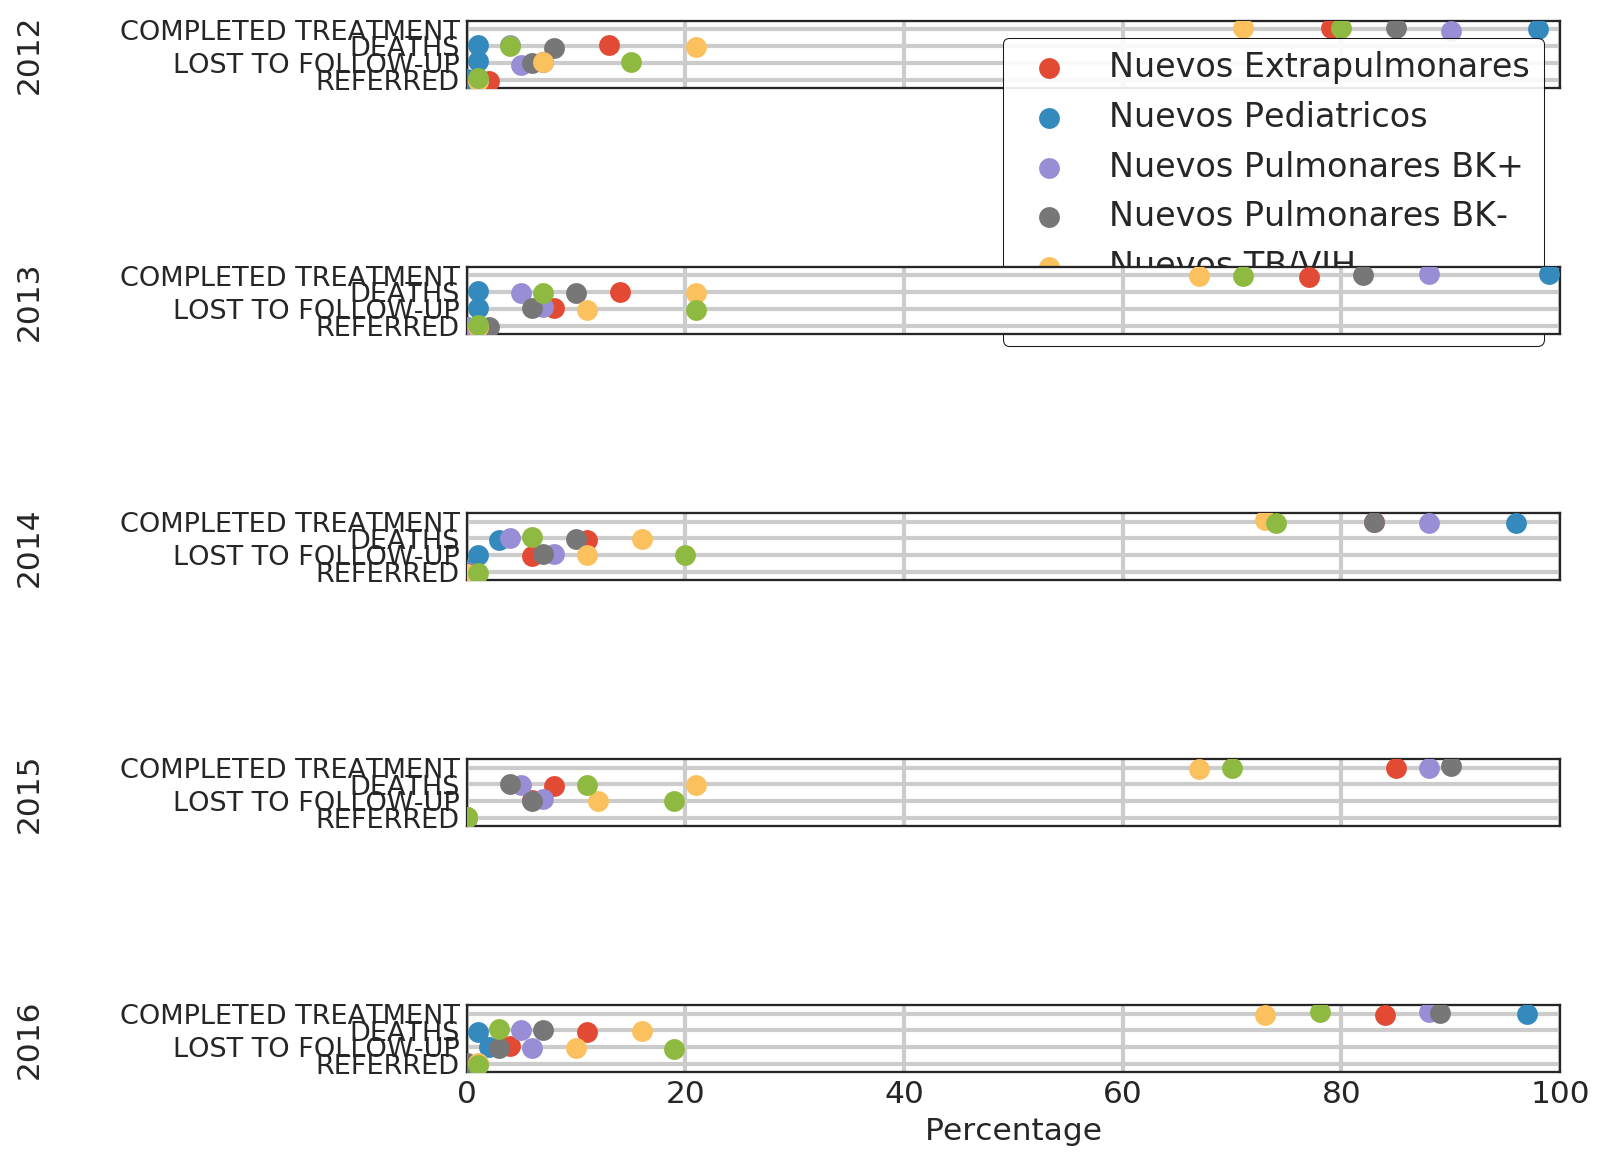

In [7]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "table", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp = temp.stack().reset_index()[lambda x: x["row_name_B"] != "total"]
temp.columns = ["Year", "TB Category", "Outcome", "Percentage"]

grid = sb.FacetGrid(temp, row = "Year", hue="TB Category", aspect=7, size=1.5)
grid.map(sb.stripplot, "Percentage", "Outcome",  size=10, jitter=True, dodge=True) 
for ax in grid.axes: 
    ax[0].set_ylabel(ax[0].get_title()[-4:]+"\n\n")
    ax[0].set_title('')
    ax[0].grid(b = True, which="both", axis = "both", )
    ax[0].spines['top'].set_visible(True)
    ax[0].spines['right'].set_visible(True)
    ax[0].set_xlim(0,100)
hs,ls = grid.axes[0][0].get_legend_handles_labels()
grid.axes[0][0].legend(hs[0:24:4], ls[0:24:4])
grid.fig.tight_layout(pad=0.0, h_pad=0.1, w_pad=0.1, rect=(0,0,1,1) )

row_name_B              COMPLETED TREATMENT  DEATHS  LOST TO FOLLOW-UP  \
table                                                                    
Nuevos Extrapulmonares               1164.0   159.0               91.0   
Nuevos Pediatricos                   1096.0    15.0               13.0   
Nuevos Pulmonares BK+                9494.0   511.0              698.0   
Nuevos Pulmonares BK-                1691.0   143.0              115.0   
Nuevos TB/VIH                         724.0   196.0              103.0   
Retratamiento                         619.0    52.0              156.0   

row_name_B              REFERRED    total  
table                                      
Nuevos Extrapulmonares      11.0   1425.0  
Nuevos Pediatricos           0.0   1124.0  
Nuevos Pulmonares BK+       38.0  10741.0  
Nuevos Pulmonares BK-       16.0   1965.0  
Nuevos TB/VIH                6.0   1029.0  
Retratamiento                5.0    832.0  


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


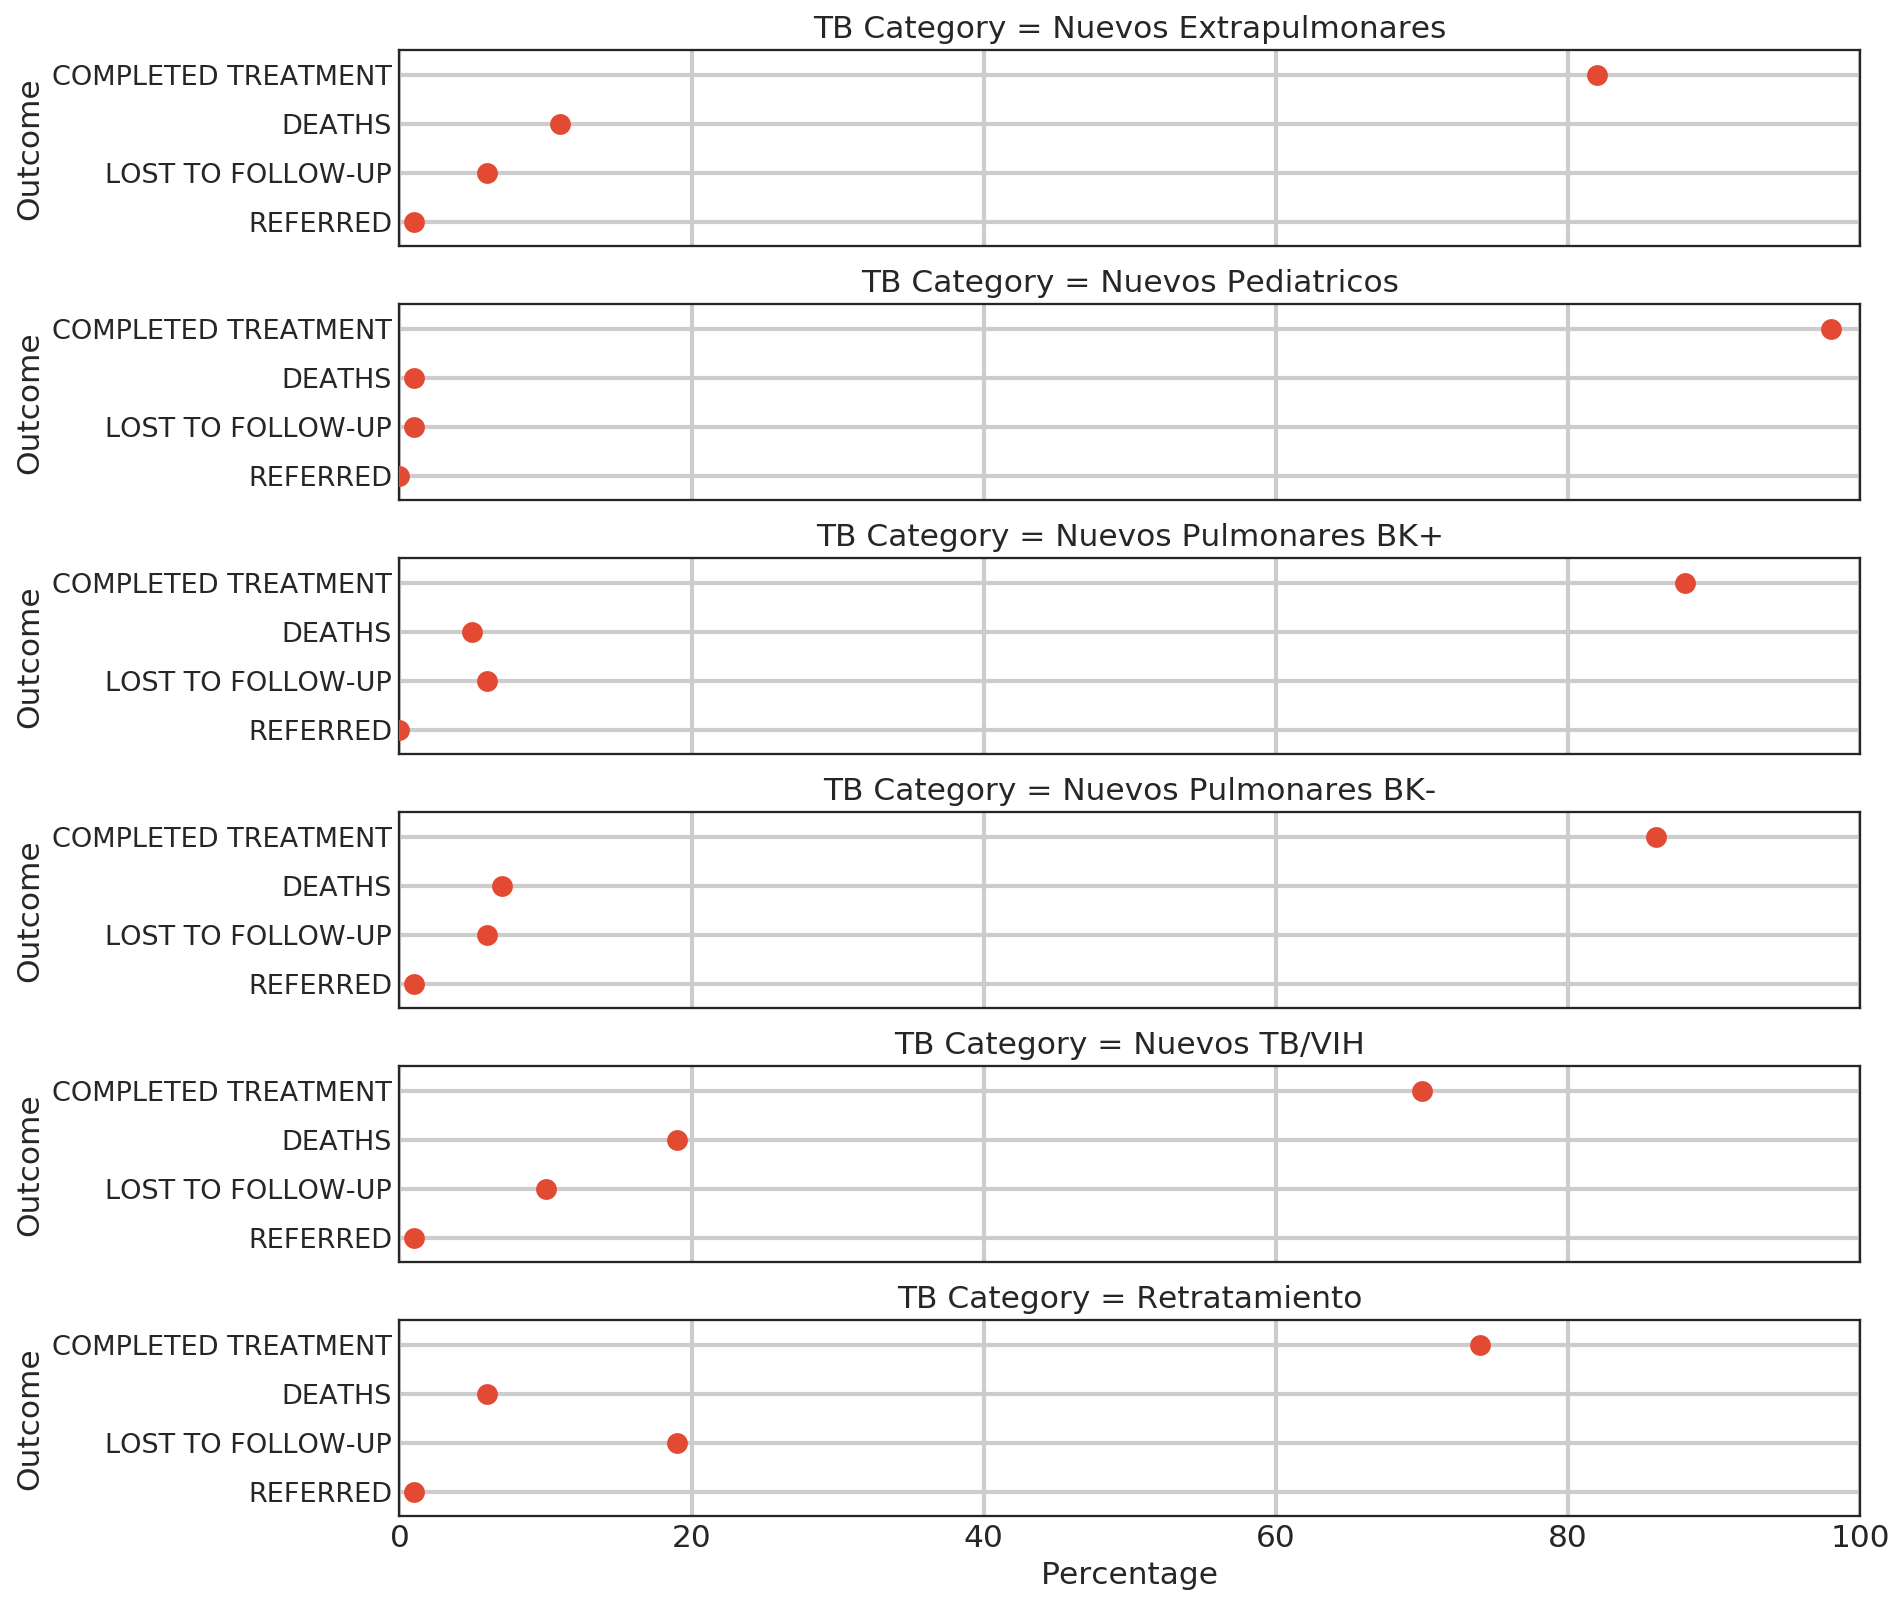

In [8]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0)].\
    groupby(["table", "row_name_B"]).value.sum(skipna=True).unstack(1).fillna(0)
temp["total"] = temp.sum(axis=1) 
print(temp)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp = temp.stack().reset_index()[lambda x: x["row_name_B"] != "total"]
temp.columns = ["TB Category", "Outcome", "Percentage"]

grid = sb.FacetGrid(temp, row = "TB Category", aspect=7, size=1.8)
grid.map(sb.stripplot, "Percentage", "Outcome",  size=10) 
for ax in grid.axes: 
    ax[0].grid(b = True, which="both", axis = "both", )
    ax[0].spines['top'].set_visible(True)
    ax[0].spines['right'].set_visible(True)
    ax[0].set_xlim(0,100)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


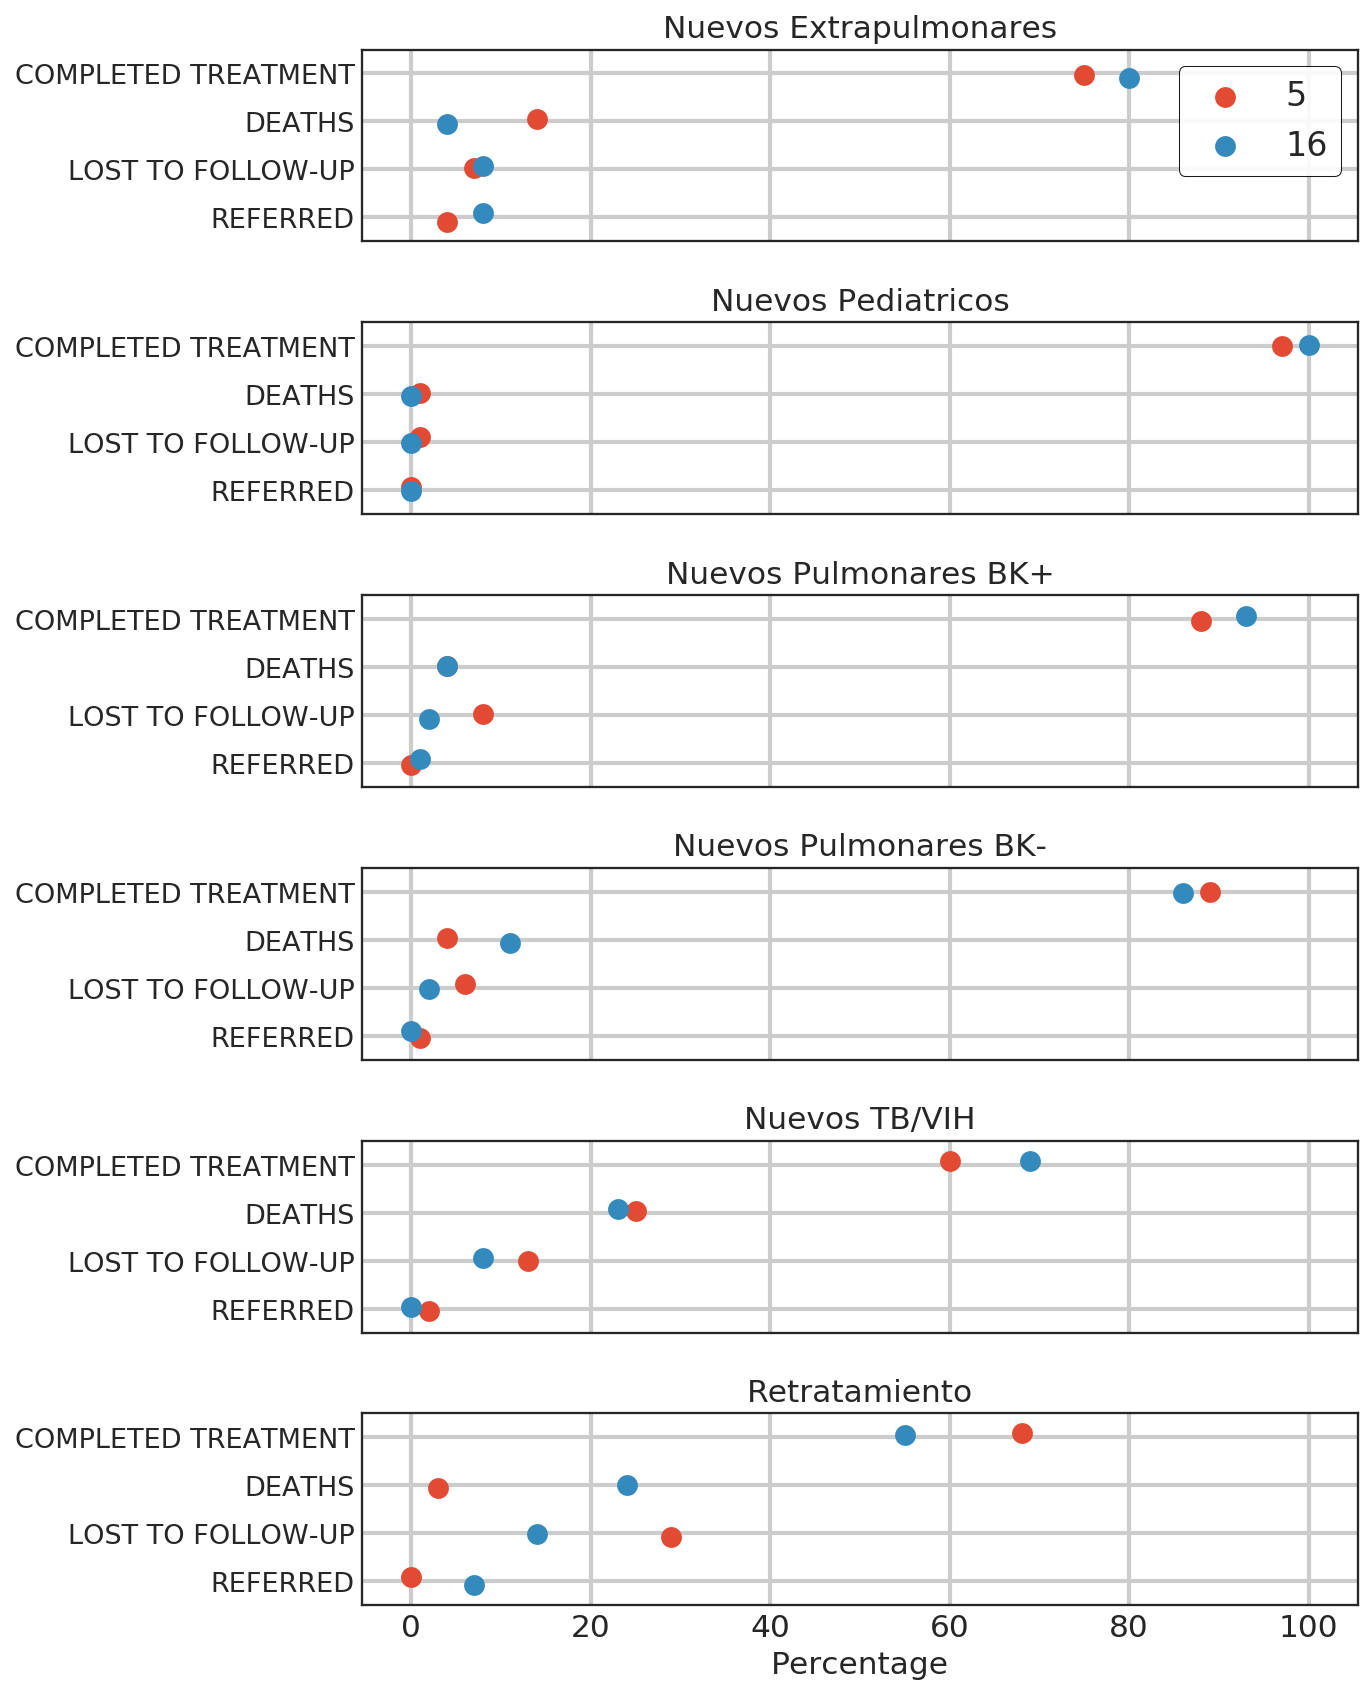

In [9]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode.isin([16,5]) )].\
    groupby(["deptocode", "table", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp = temp.stack().reset_index()[lambda x: x["row_name_B"] != "total"]
temp.columns = ["Depto", "TB Category", "Outflow condition", "Percentage"]

grid = sb.FacetGrid(temp, row = "TB Category", hue="Depto", aspect=5, size=1.9 )
grid.map(sb.stripplot, "Percentage", "Outflow condition", size=10, jitter = True)
for ax in grid.axes: 
    ax[0].set_ylabel('')
    ax[0].spines['top'].set_visible(True)
    ax[0].spines['right'].set_visible(True)
    ax[0].set_title(ax[0].get_title().split(" = ")[1])
    ax[0].grid(True)
hs,ls = grid.axes[0][0].get_legend_handles_labels()
grid.axes[0][0].legend([hs[0],hs[-1]], [ls[0],ls[-1]])

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


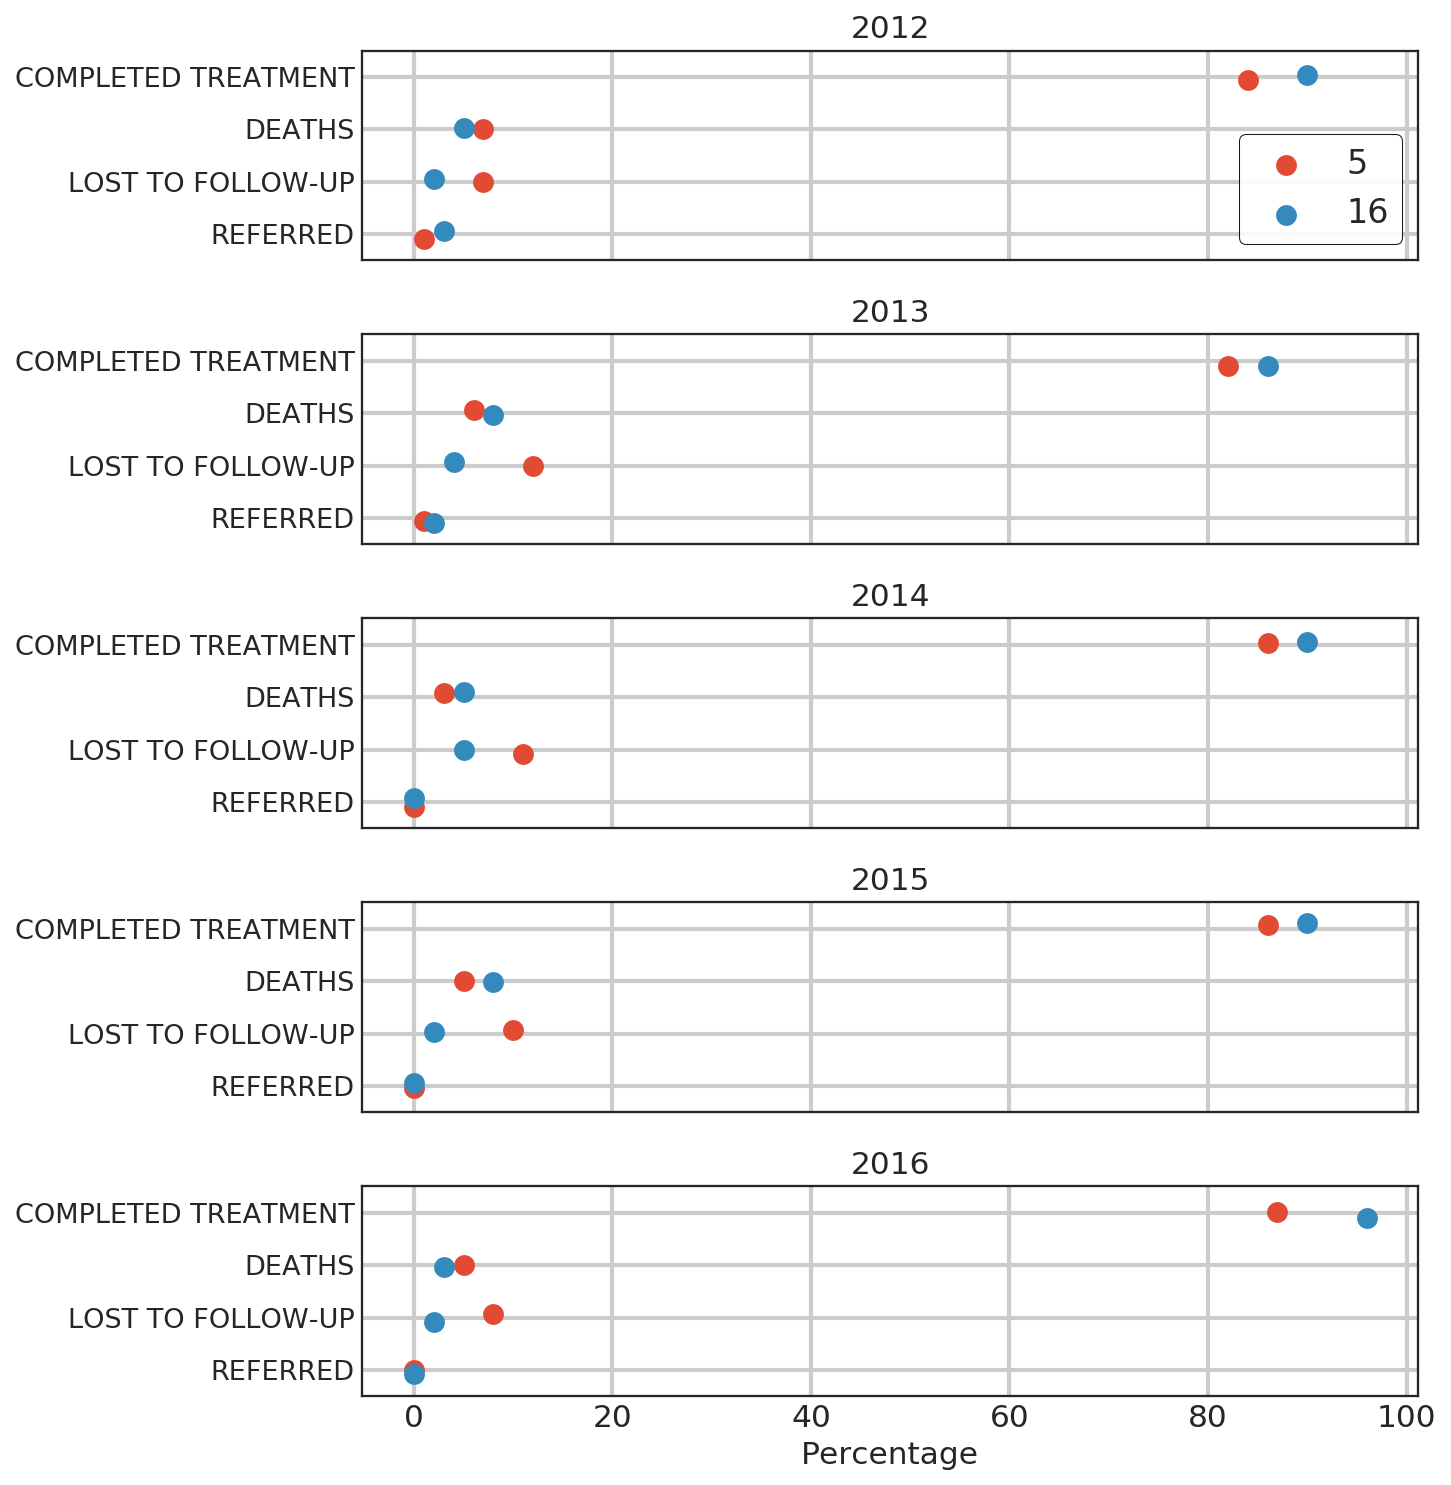

In [10]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode.isin([16,5]) )].\
    groupby(["deptocode", "year", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=0))
temp = temp.stack().reset_index()[lambda x: x["row_name_B"] != "total"]
temp.columns = ["Depto", "Year", "Outflow condition", "Percentage"]

grid = sb.FacetGrid(temp, row = "Year", hue="Depto", aspect=5, size=2)
grid.map(sb.stripplot, "Percentage", "Outflow condition", size=10, jitter = True)
for ax in grid.axes: 
    ax[0].set_ylabel('')
    ax[0].spines['top'].set_visible(True)
    ax[0].spines['right'].set_visible(True)
    ax[0].set_title(ax[0].get_title().split(" = ")[1])
    ax[0].grid(True)
hs,ls = grid.axes[0][0].get_legend_handles_labels()
grid.axes[0][0].legend([hs[0],hs[-1]], [ls[0],ls[-1]])

In [36]:
def year_cohort_plot(group0 = "year", group1 = "row_name_B", 
                     data_filter = None, hue = None,
                     transpose_titles = False,
                     palette = "Set2", aspect = 6):
    # Lets start with the missing basic data for pediatric and extrapulmonares cases: 
    groups = [group0, group1]
    if hue is not None:
        groups = groups + [hue]

    temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
           (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                               "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"])) &
           (data_filter if data_filter is not None else True)].\
        groupby(groups).value.sum().unstack(1)
    temp["total"] = temp.sum(axis=1)
    output = "Counts\n" + str(temp)
    temp = temp.fillna(0)
    temp = \
        (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=1))
    output += "\nPercentages\n"  + str(temp)
    
    temp = temp.stack().reset_index()[lambda x: x[group1] != "total"]
    temp.columns = ["Group0", "Group1", "Percentage"] if hue is None else \
                        ["Group0", "Hue", "Group1", "Percentage"]
    grid = sb.FacetGrid(temp, row = "Group0", # hue = None if hue is None else "Hue", 
                        aspect=aspect, size=2.0 if hue is not None else 1.4)
    grid.map(sb.stripplot, "Percentage", "Group1", "Hue", 
             palette = palette, dodge = True, size=8, linewidth=1.5)
    for ax in grid.axes:  #sb.stripplot()
        title = ax[0].get_title().split(" = ")[1]
        if transpose_titles:
            ax[0].set_ylabel(title)
            ax[0].set_title('')
        else:
            ax[0].set_title(title)
            ax[0].set_ylabel('')
        ax[0].grid(b = True, which="both", axis = "both", )
        ax[0].spines['top'].set_visible(True)
        ax[0].spines['right'].set_visible(True)
        ax[0].set_xlim(0,100)
    if hue is not None:
        hs,ls = grid.axes[0][0].get_legend_handles_labels()
        interval = len(temp.Hue.unique())
        grid.fig.legend( hs[0:interval], ls[0:interval])
    return grid, output

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:708: UserWarning: Using the stripplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


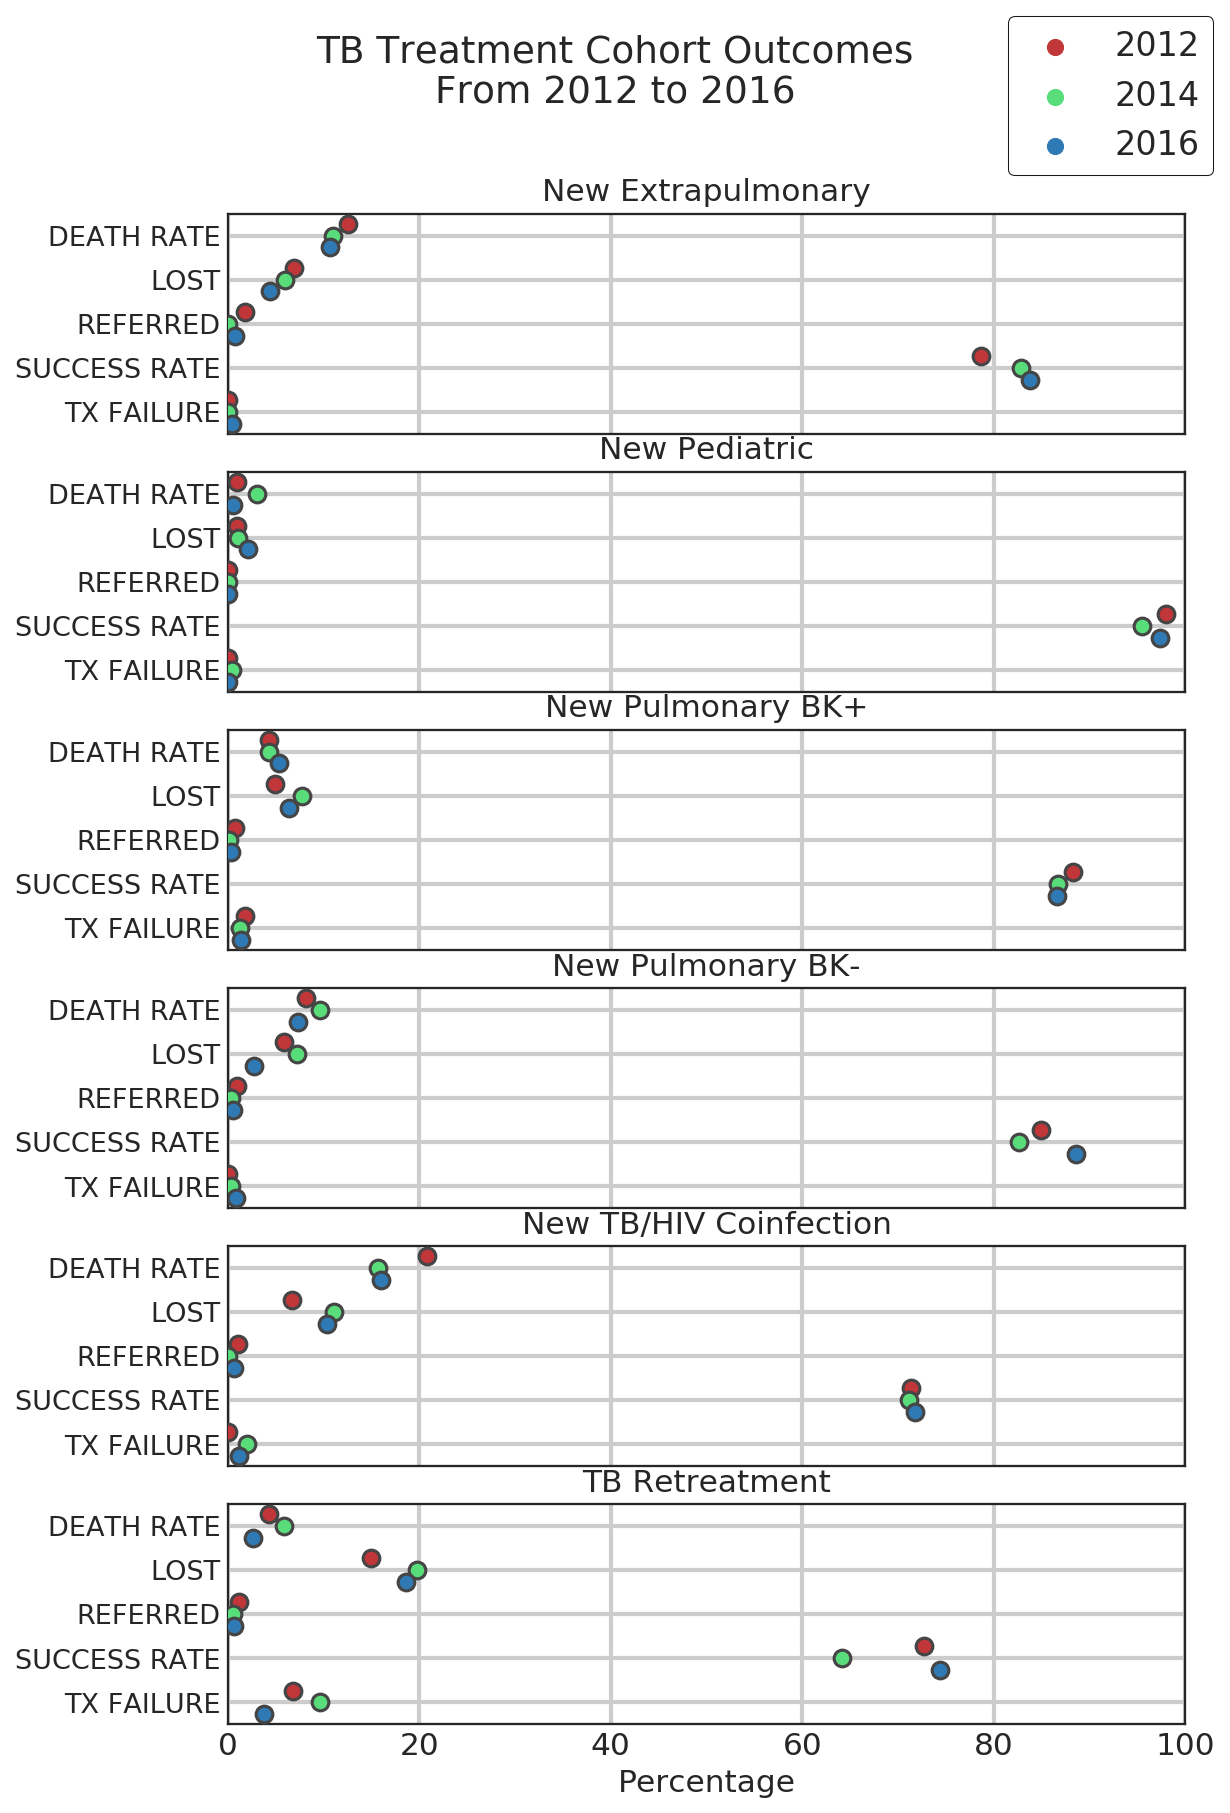

In [38]:
datadf["row_name_C"] = datadf.row_name.map(lambda x: \
        "LOST"  if x in ["ABANDONO/PERDIDA_SEGM"]\
        else "SUCCESS RATE" if x in ["CURADOS", "TRATAMIENTOS_COMPLETOS", 
                                 "TRATAMIENTOS COMPLETOS"] \
        else "TX FAILURE" if x == "FRACASO_TERAPEUTICO" \
        else "REFERRED" if x in ["TRANSFERIDOS", "TRASLADOS"] \
        else "DEATH RATE" if x == "FALLECIDOS" \
         else x)
datadf["eng_table"] = datadf.table.replace({
    "Nuevos Extrapulmonares": "New Extrapulmonary",
    "Nuevos Pediatricos":"New Pediatric",
    "Nuevos Pulmonares BK+": "New Pulmonary BK+",
    "Nuevos Pulmonares BK-": "New Pulmonary BK-",
    "Nuevos TB/VIH": "New TB/HIV Coinfection",
    "Retratamiento": "TB Retreatment"
})
palette = sb.color_palette("RdBu")
grid, output1 = year_cohort_plot(data_filter = (datadf.deptocode!=0)&(datadf.year.isin([2012, 2014, 2016])), 
                                 group0="eng_table", hue = "year", group1 = "row_name_C",
                                 palette = {
                                     2012: palette[0],
                                     2014: "#58DD7A",
                                     2016: palette[5]
                                 },
                                transpose_titles = False,
                                aspect = 4)
grid.fig.suptitle("TB Treatment Cohort Outcomes\nFrom 2012 to 2016")
grid.fig.tight_layout(pad=0.0, h_pad=0.1, w_pad=0.1, rect=[0,0,1,0.9])
#print(output1)

row_name  ABANDONO/PERDIDA_SEGM  CURADOS  FALLECIDOS  FRACASO_TERAPEUTICO  \
year                                                                        
2012                      152.0   1762.0       164.0                 38.0   
2013                      193.0   1737.0       185.0                 26.0   
2014                      198.0   1682.0       156.0                 28.0   
2015                      197.0   1787.0       129.0                 32.0   
2016                      169.0   1742.0       166.0                 34.0   

row_name  TRANSFERIDOS  TRATAMIENTOS COMPLETOS   total  
year                                                    
2012              25.0                  1076.0  3217.0  
2013              20.0                   923.0  3084.0  
2014               2.0                   811.0  2877.0  
2015               8.0                   957.0  3110.0  
2016              10.0                   846.0  2967.0  


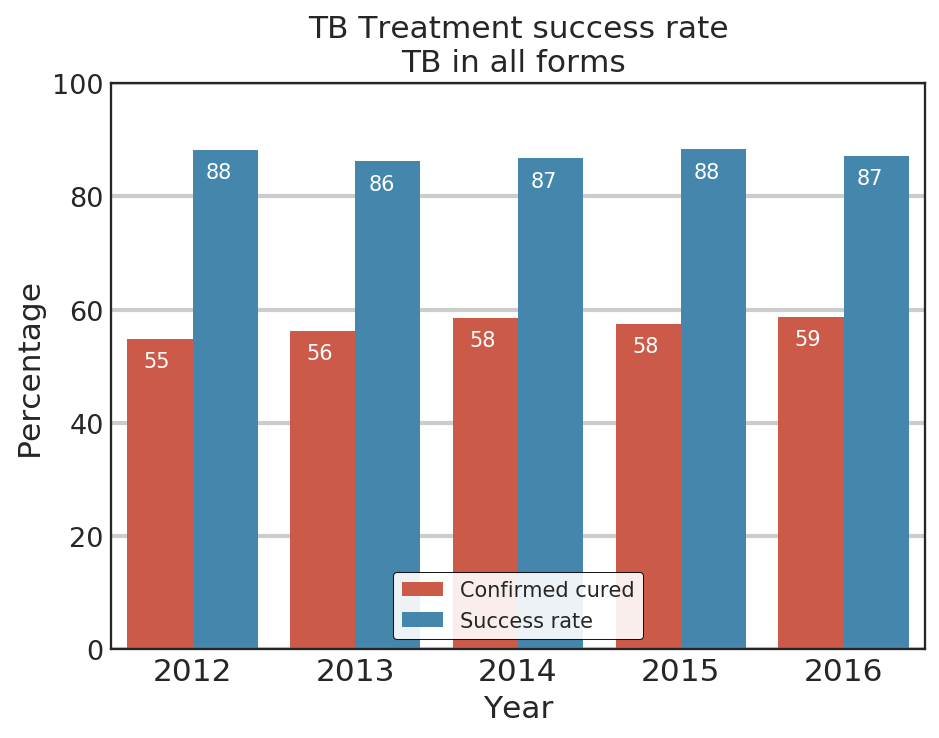

In [36]:
plt.rcParams["figure.figsize"] = [7,5]
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                           "Nuevos Extrapulmonares", 
                           #"Nuevos TB/VIH", #"Retratamiento"
                          ])) &
       (datadf.deptocode==0)].\
    groupby(["year", "row_name"]).value.sum().unstack(1)
temp["total"] = temp.sum(axis=1)
print(temp)
output = "Counts\n" + str(temp)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=1))
output += "\nPercentages\n"  + str(temp)

temp = temp[["CURADOS", "TRATAMIENTOS COMPLETOS", "total"]]
temp.columns = ["Confirmed cured", "Presumably cured", "total"]
temp["Success rate"]= temp["Presumably cured"] + temp["Confirmed cured"]
#temp.stack().reset_index()
temp = temp.stack().reset_index()[lambda x: x["level_1"].isin(["Success rate", "Confirmed cured"])]
temp.columns = ["Year", "Category", "Percentage"]
plt.rcParams["legend.fontsize"] = 7
sb.barplot("Year", "Percentage", "Category", temp, dodge=True, hue_order=["Confirmed cured", "Success rate"], )
plt.legend(loc = "lower center", fontsize=10)
plt.ylim(0,100)
plt.title("TB Treatment success rate\nTB in all forms ")
c = 0
for i, row in temp.iterrows():
    plt.annotate(str(round(row["Percentage"])), 
                 [c - 0.3  if row["Category"] == "Confirmed cured" else c-0.42, 
                  row["Percentage"]-5], color= "white")
    c += 0.5
    
# Para 2016 los datos de 82%/4% de curados/tx completos viene sólo de los BK+ (excluyendo Genexpert y cultivos)

row_name  ABANDONO/PERDIDA_SEGM  CURADOS  FALLECIDOS  FRACASO_TERAPEUTICO  \
year                                                                        
2012                      194.0   1926.0       227.0                 49.0   
2013                      252.0   1859.0       244.0                 48.0   
2014                      257.0   1829.0       197.0                 50.0   
2015                      250.0   1912.0       183.0                 46.0   
2016                      215.0   1899.0       196.0                 42.0   

row_name  TRANSFERIDOS  TRATAMIENTOS COMPLETOS   total  
year                                                    
2012              30.0                  1221.0  3647.0  
2013              23.0                  1046.0  3472.0  
2014               3.0                   925.0  3261.0  
2015               8.0                  1050.0  3449.0  
2016              12.0                   922.0  3286.0  


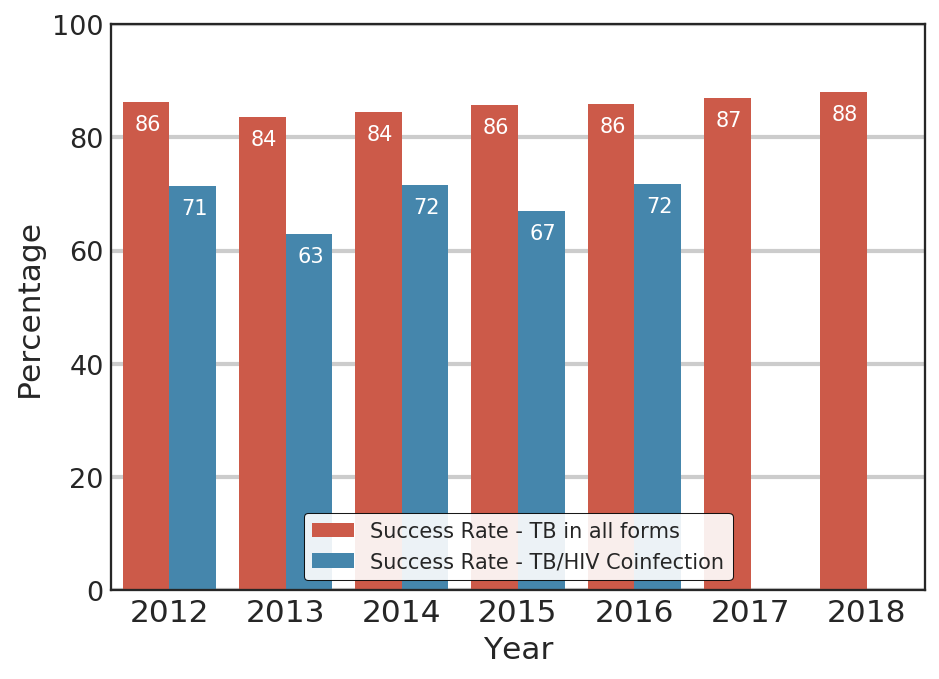

In [18]:
plt.rcParams["figure.figsize"] = [7,5]
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                           "Nuevos Extrapulmonares",
                           "Nuevos TB/VIH", "Retratamiento"
                          ])) &
       (datadf.deptocode==0)].\
    groupby(["year", "row_name"]).value.sum().unstack(1)
temp["total"] = temp.sum(axis=1)
print(temp)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=1))
temp1 = (temp["CURADOS"] + temp["TRATAMIENTOS COMPLETOS"]).rename("All Forms")
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([#"Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                           #"Nuevos Extrapulmonares", 
                           "Nuevos TB/VIH" #, #"Retratamiento"
                          ])) &
       (datadf.deptocode==0)].\
    groupby(["year", "row_name"]).value.sum().unstack(1)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=1))
temp2 = (temp["CURADOS"] + temp["TRATAMIENTOS COMPLETOS"]).rename("HIV/TB")
temp = pd.concat([temp1, temp2], 1)
temp.loc[2017] = pd.Series({ "All Forms": 87, "HIV/TB": 0 })
temp.loc[2018] = pd.Series({ "All Forms": 88, "HIV/TB": 0 })
temp.columns = ["Success Rate - TB in all forms", "Success Rate - TB/HIV Coinfection"]
temp = temp.stack().reset_index()
plt.rcParams["legend.fontsize"] = 7
sb.barplot("year", 0, "level_1", temp, dodge=True)
plt.legend(loc = "lower center", fontsize=10)
plt.ylim(0,100)
plt.title("")
plt.ylabel("Percentage")
plt.xlabel("Year")
c = 0
for i, row in temp.iterrows():
    if row[0]> 0:
        plt.annotate(str(round(row[0])), 
                 [c - 0.4 if "HIV" in row["level_1"] else c-0.3, 
                  row[0]-5], color= "white", fontsize=10)
    c += 0.5

1 Guatemala


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


2 Progreso


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


3 Sacatepéquez


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


4 Chimaltenango


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


5 Escuintla


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


6 Santa Rosa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


7 Sololá


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


8 Totonicapán


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


9 Quetzaltenango


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


10 Suchitepéquez


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


11 Retalhuleu


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


12 San Marcos


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


13 Huehuetenango


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


14 Quiché


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


15 Baja Verapaz


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


16 Alta Verapaz


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


17 Petén


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


18 Izabal


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


19 Zacapa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


20 Chiquimula


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


21 Jalapa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


22 Jutiapa


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


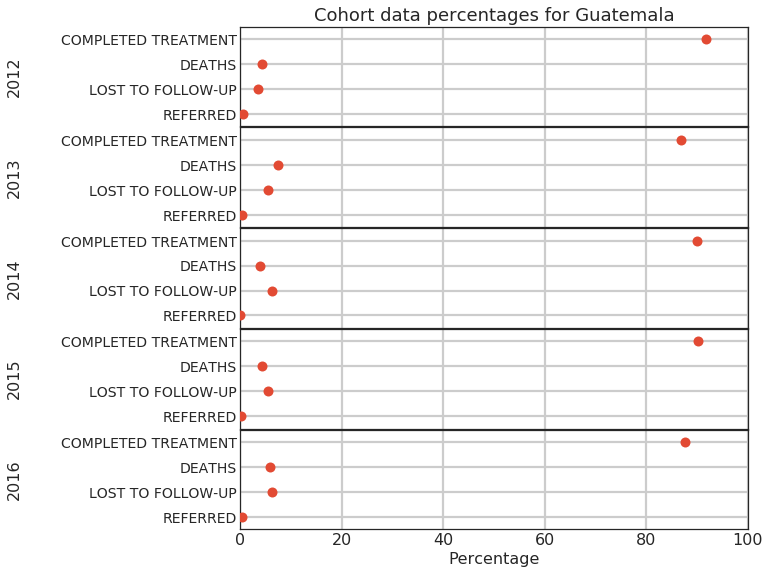

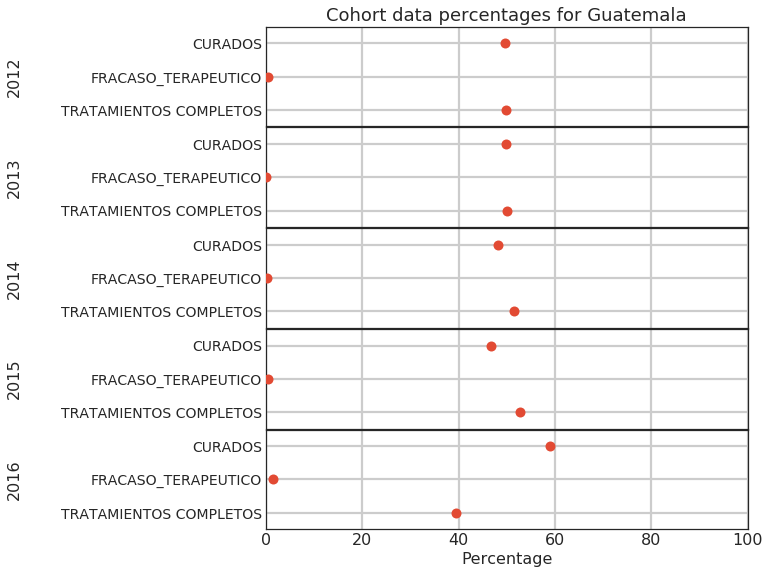

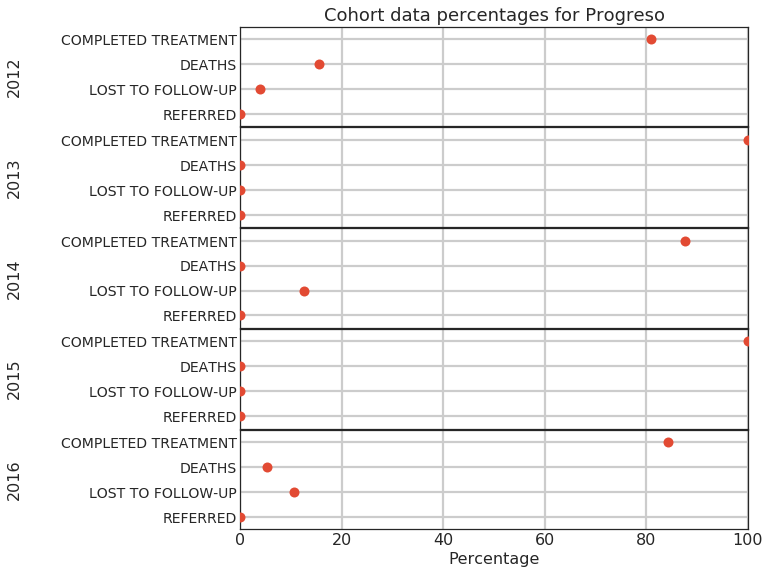

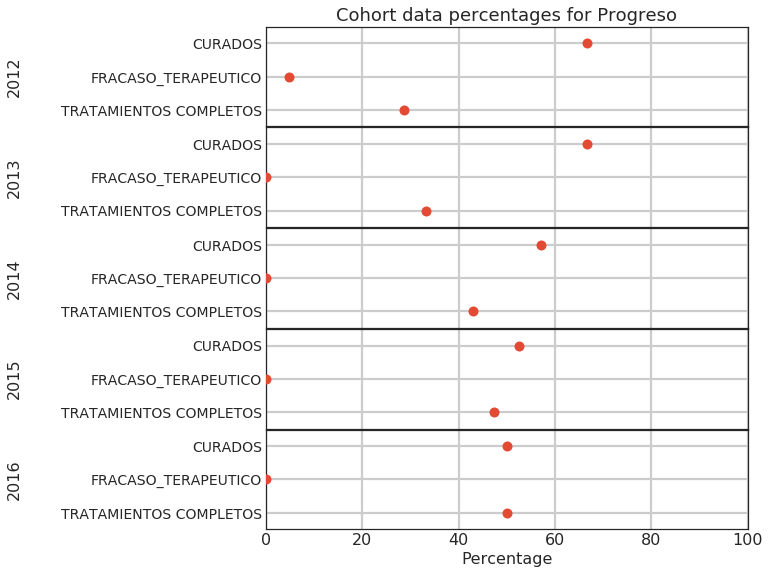

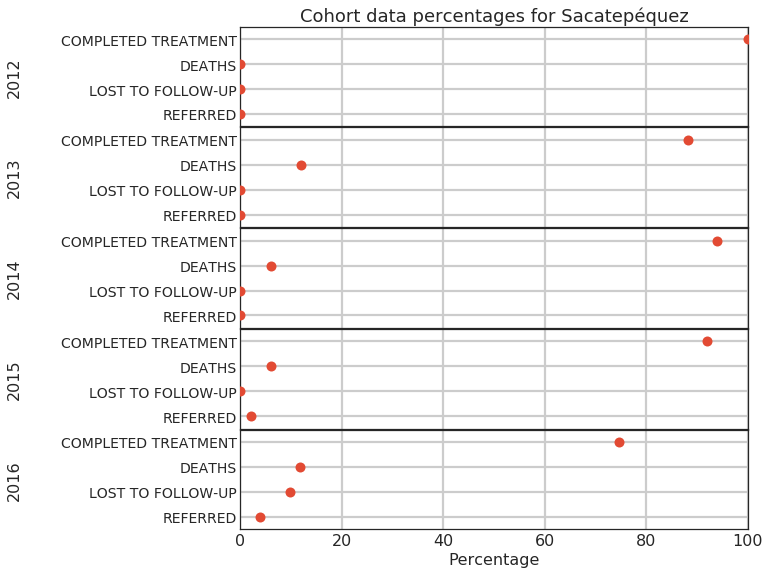

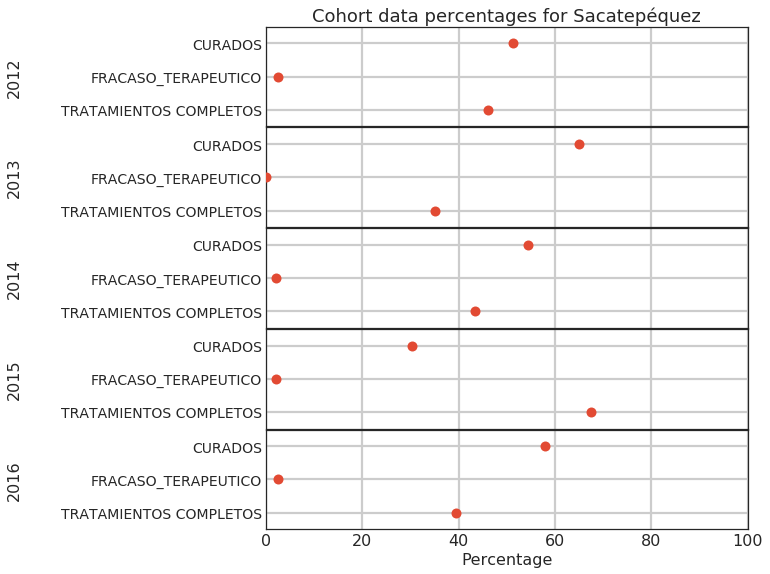

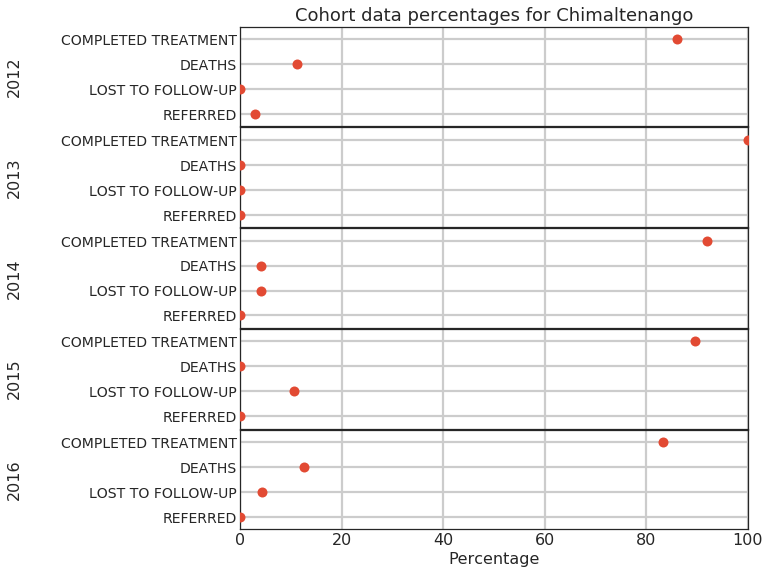

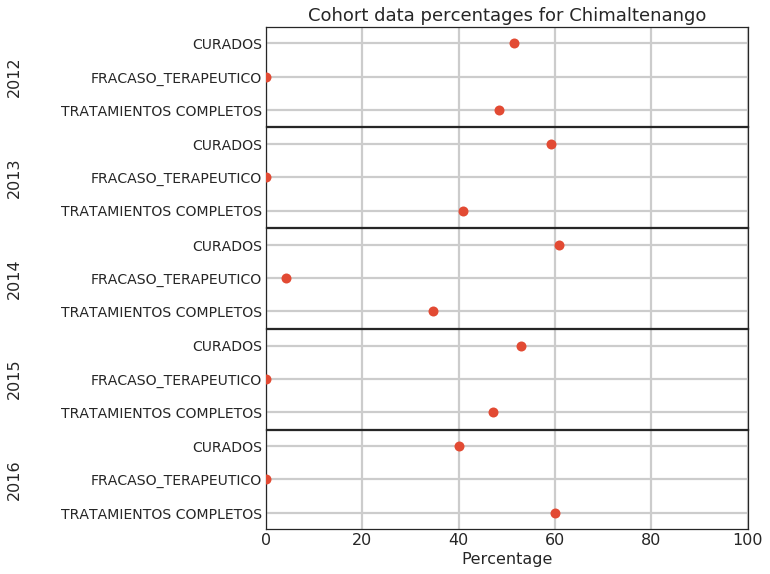

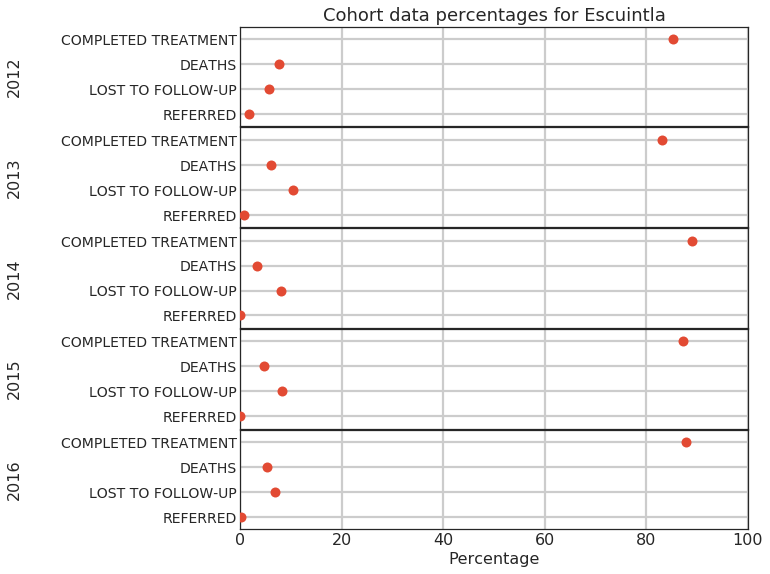

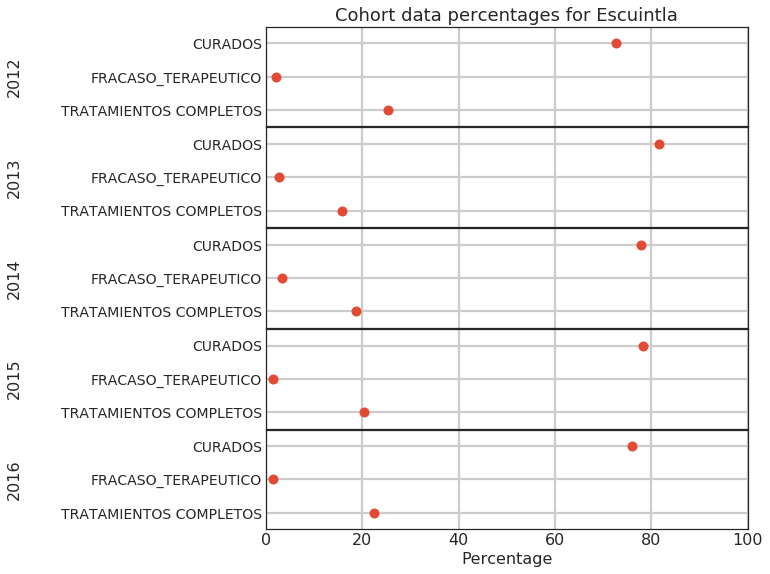

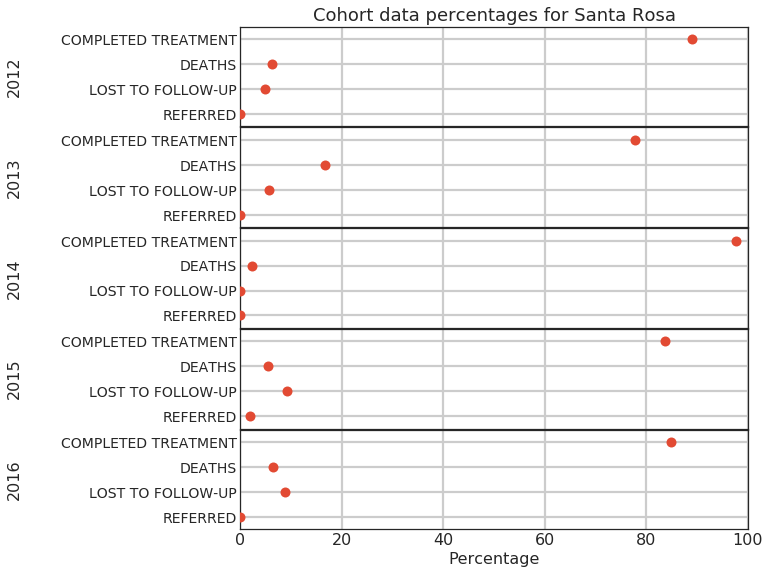

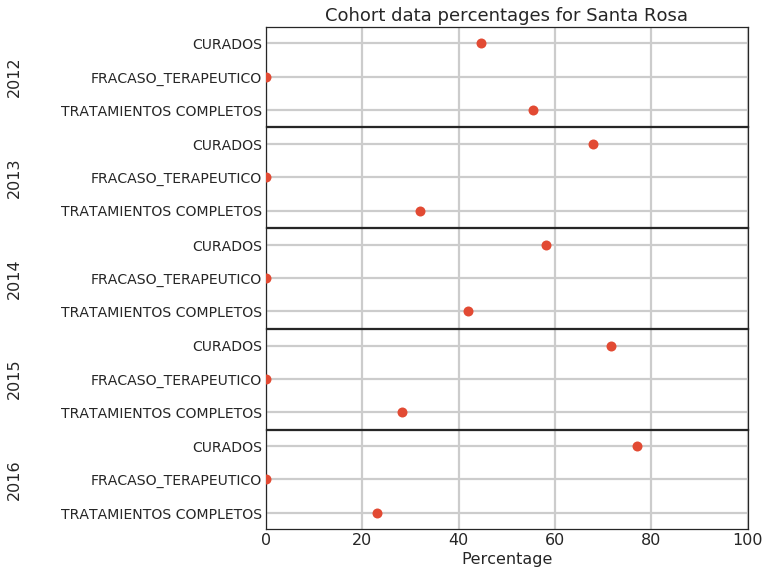

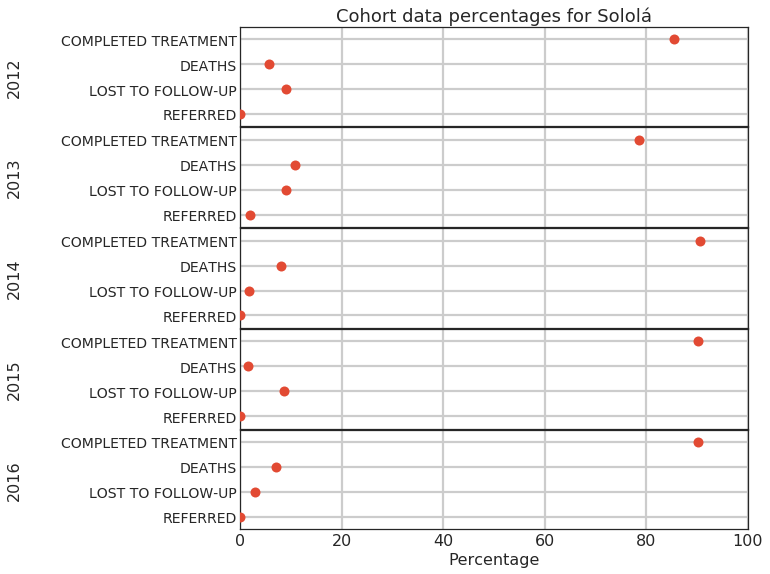

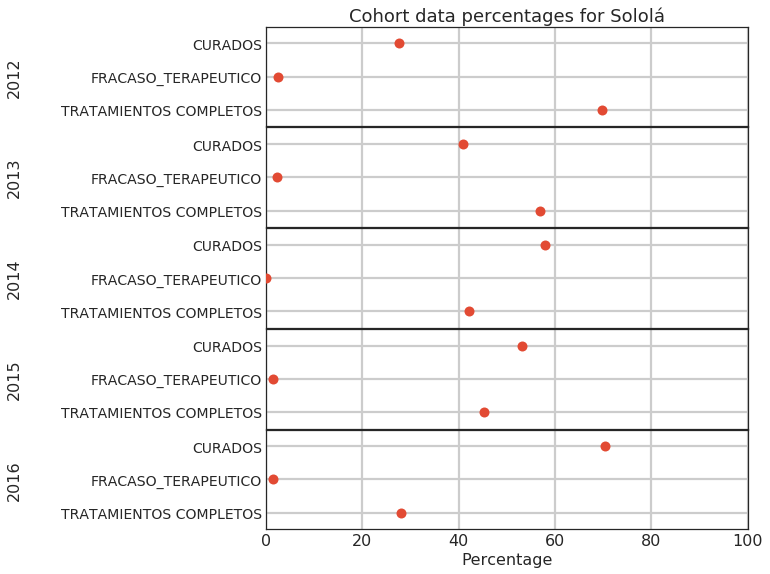

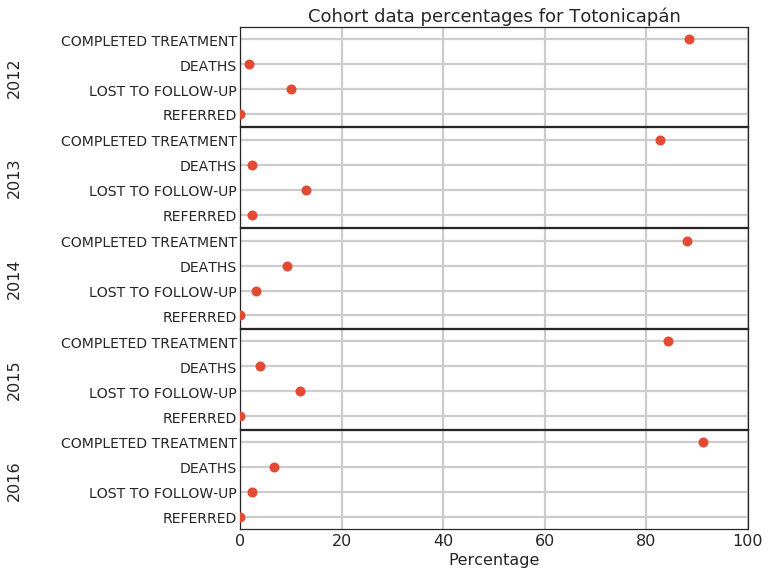

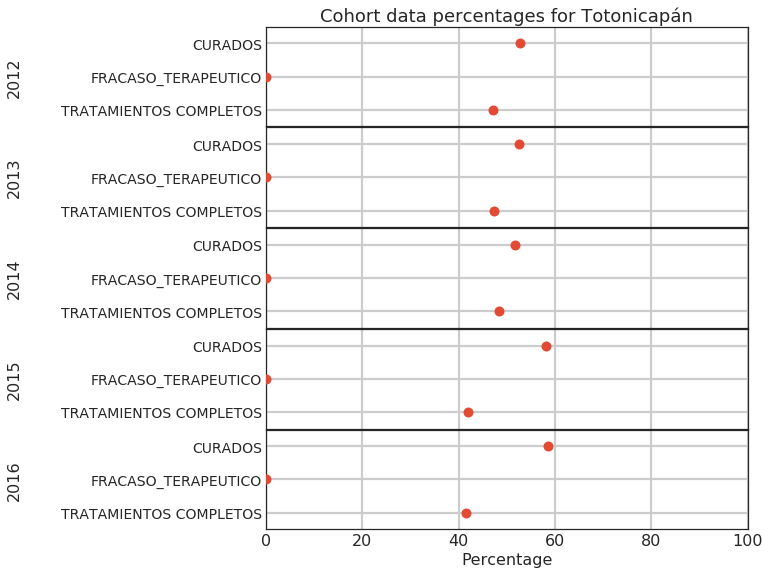

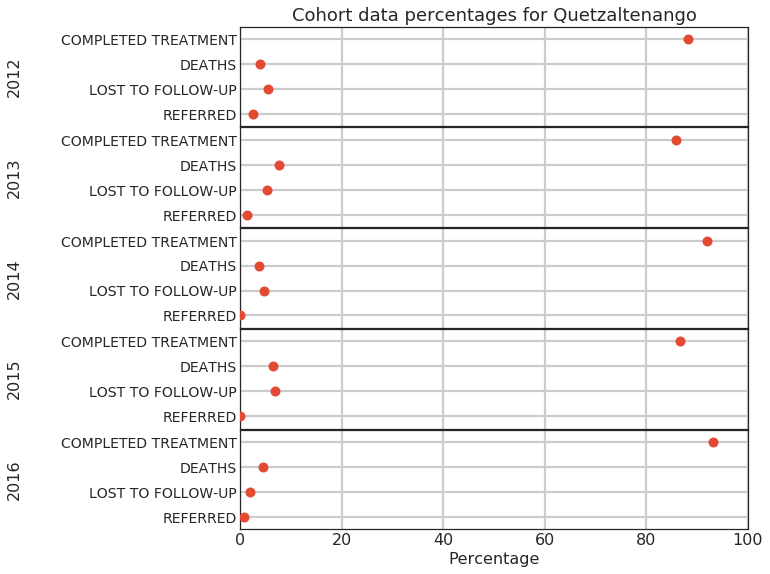

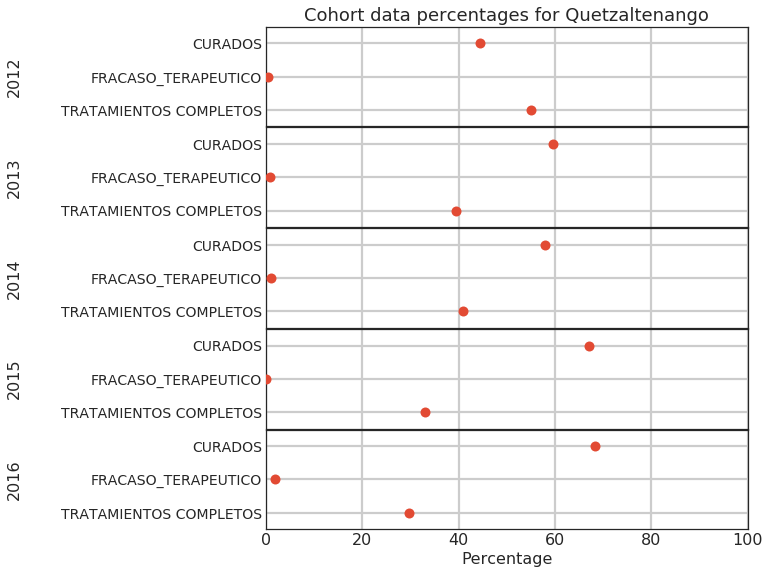

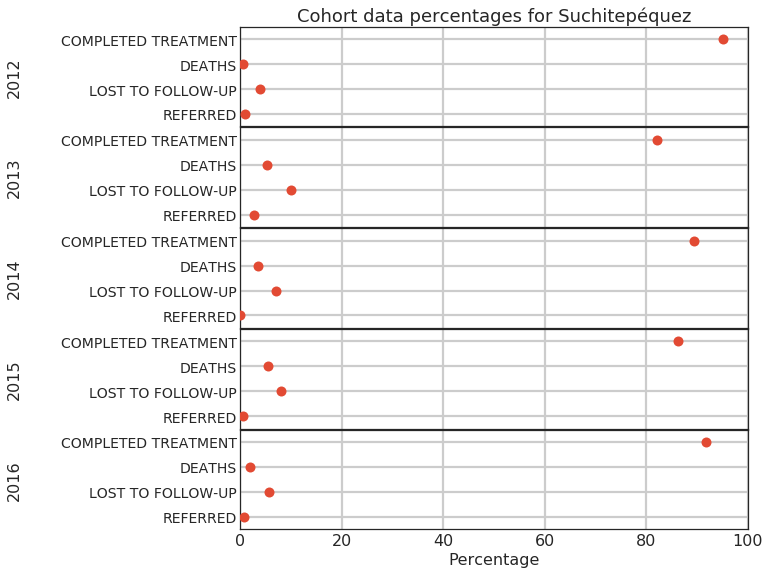

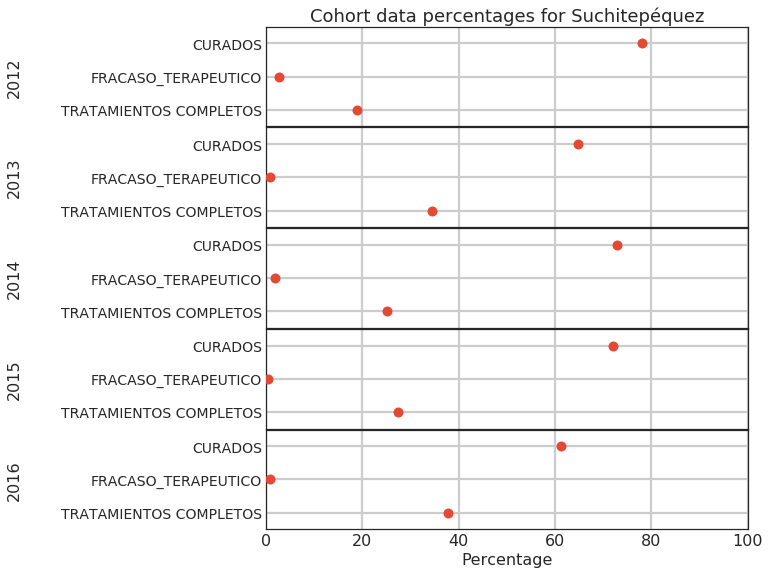

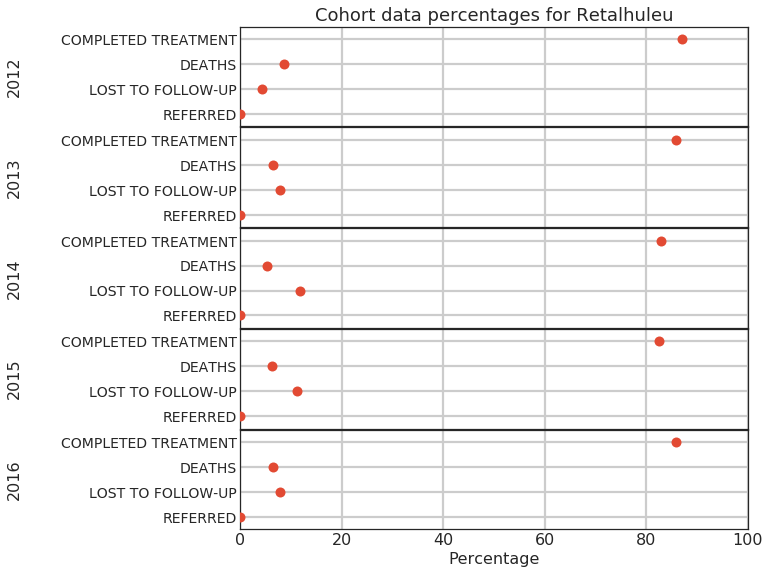

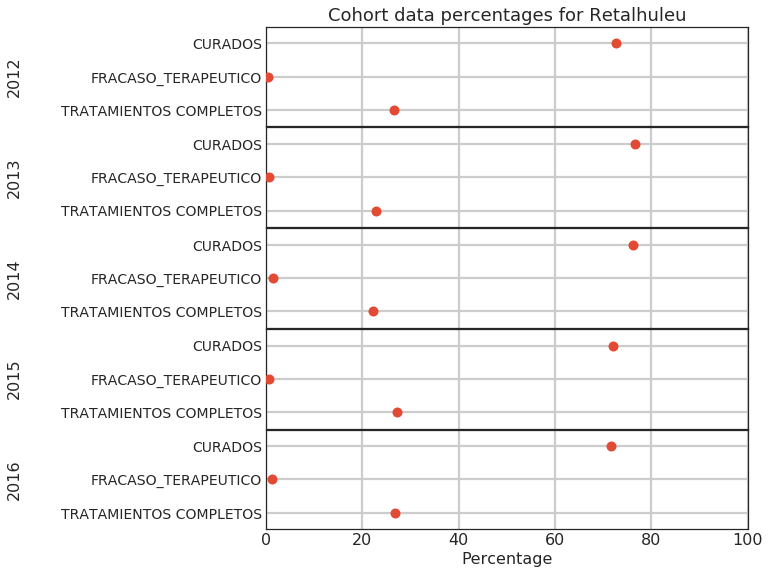

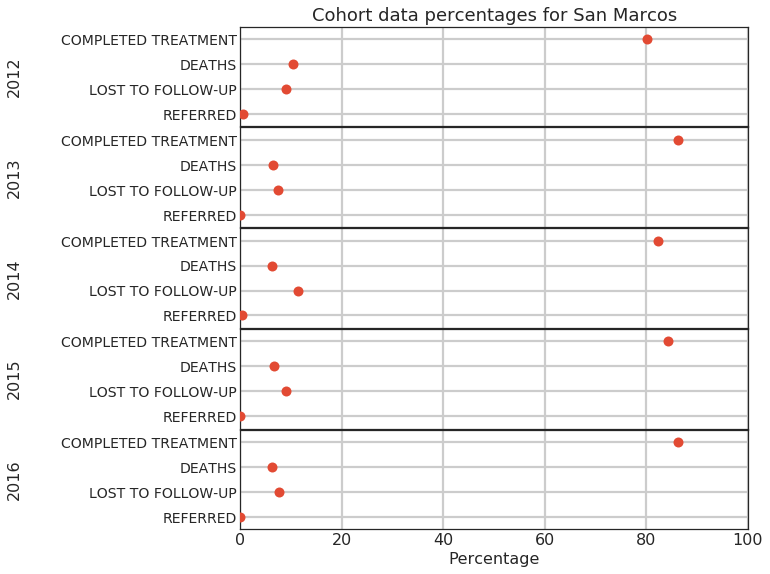

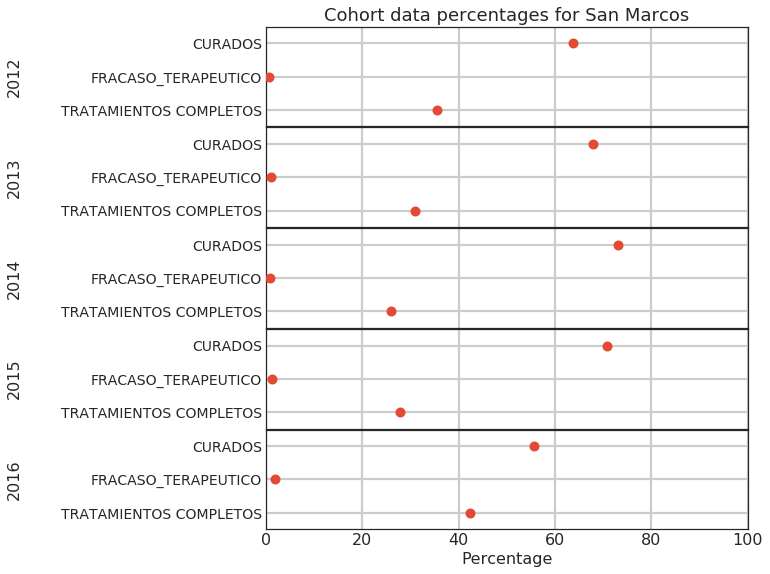

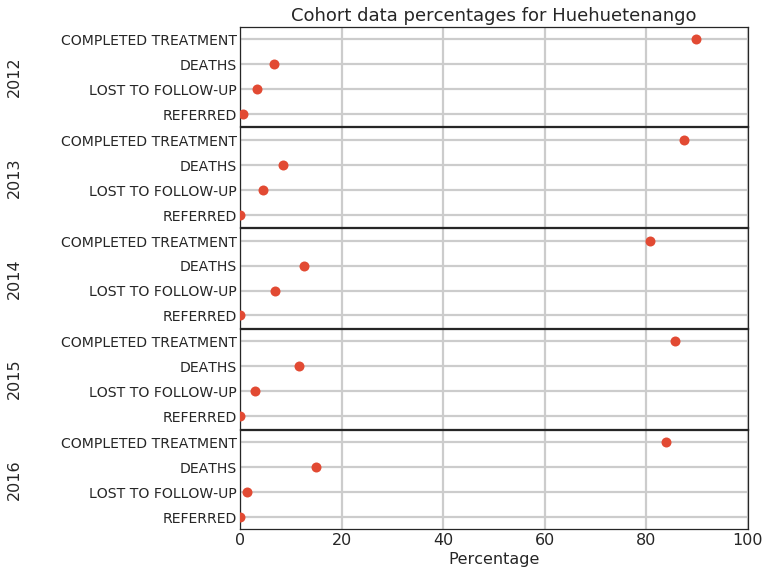

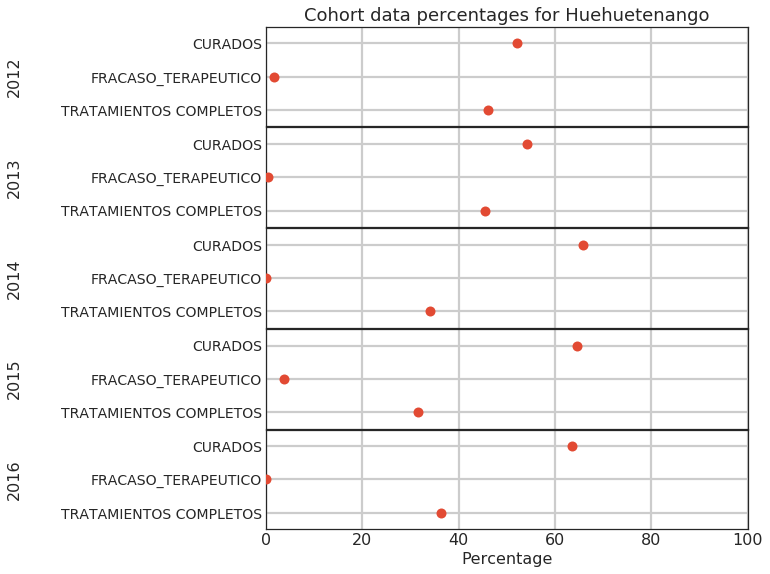

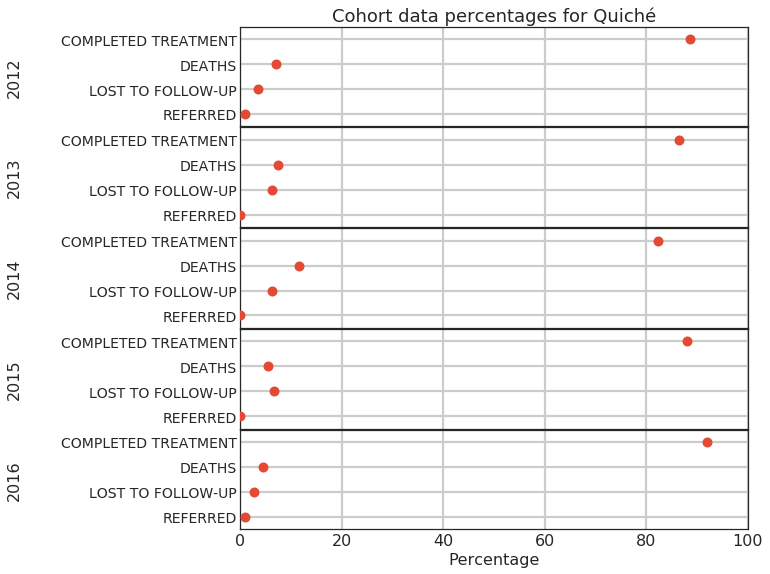

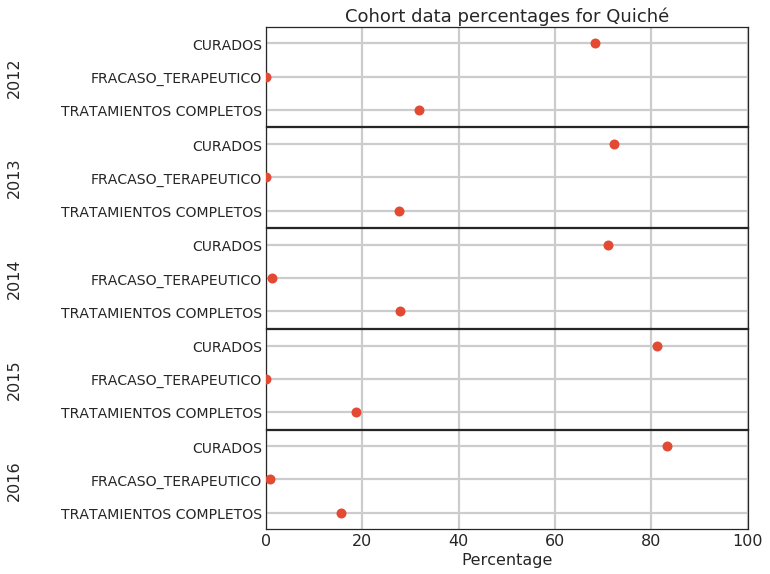

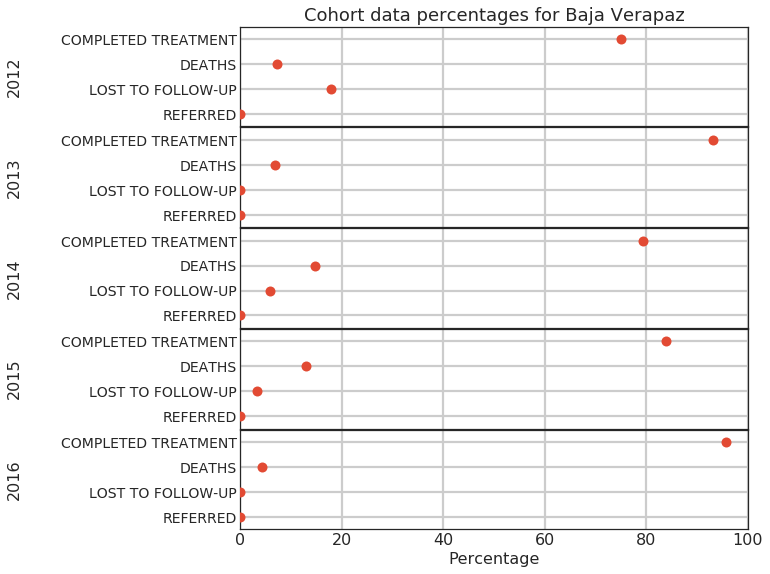

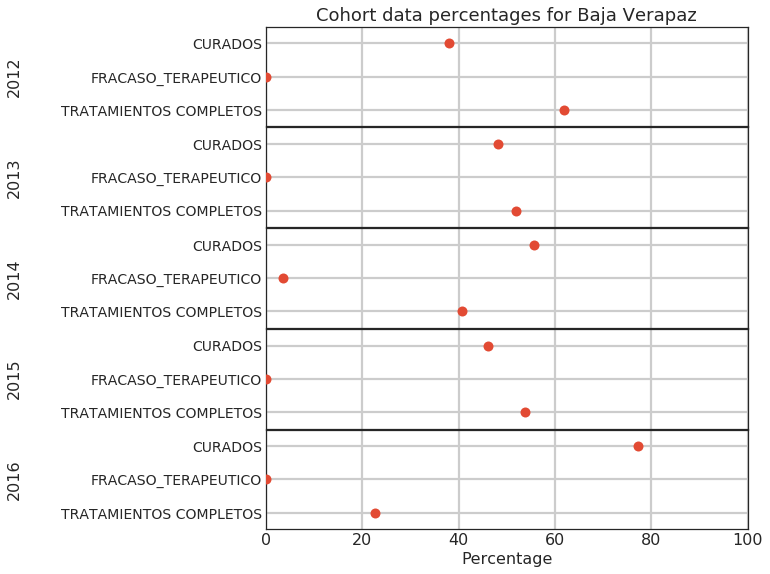

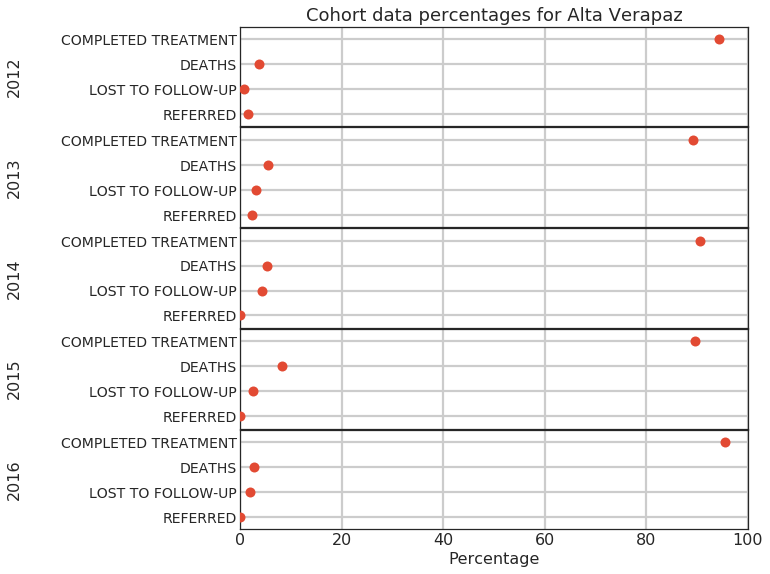

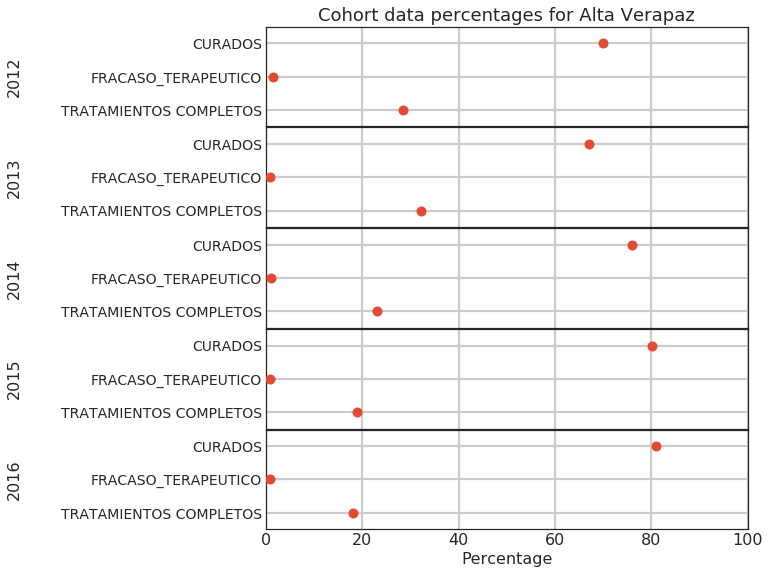

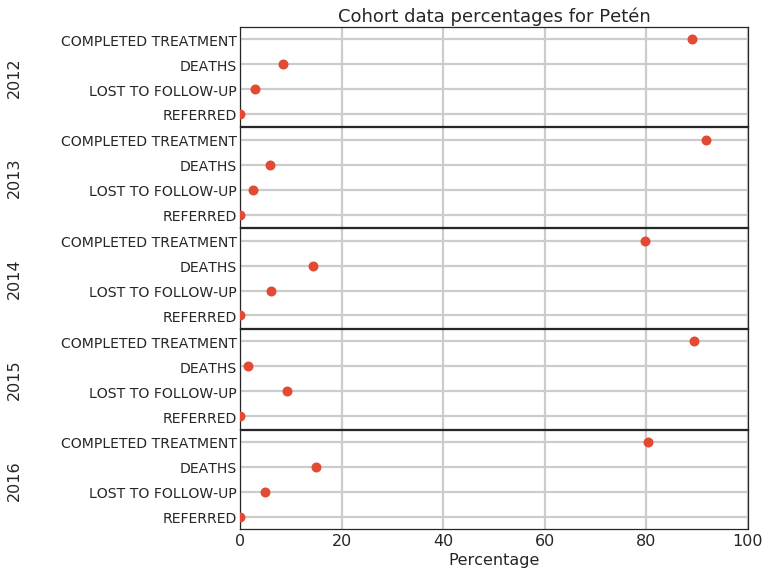

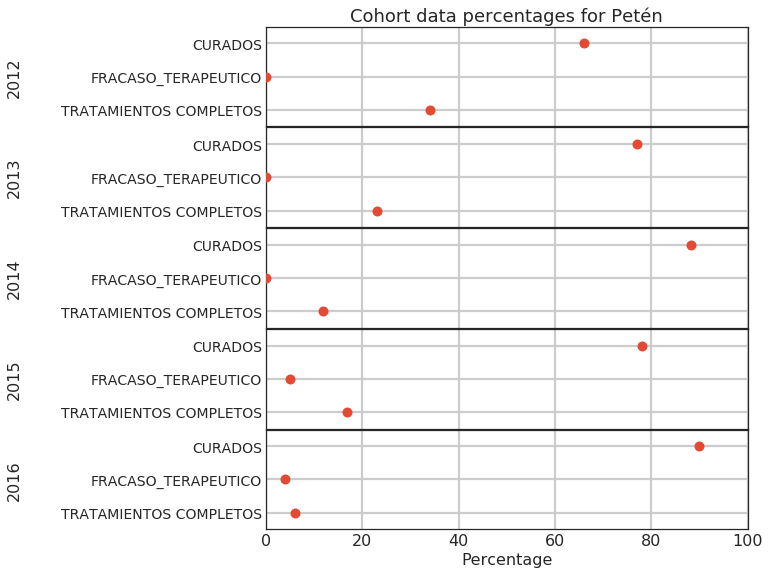

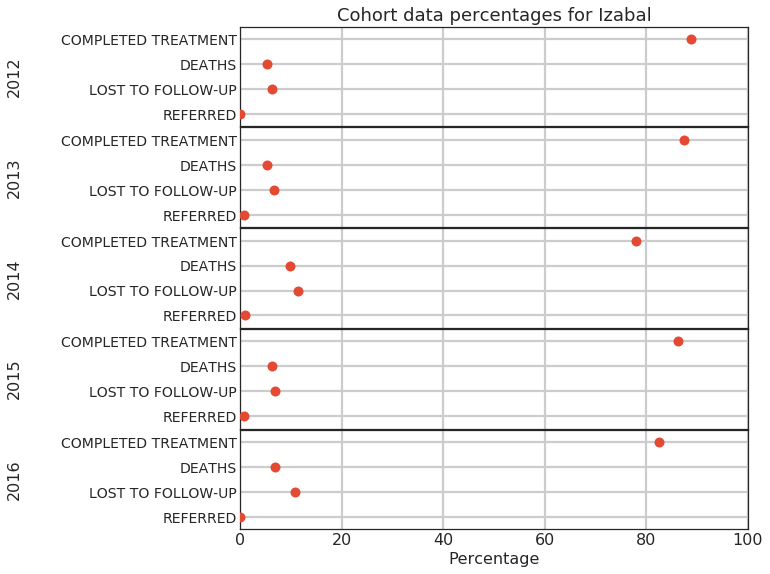

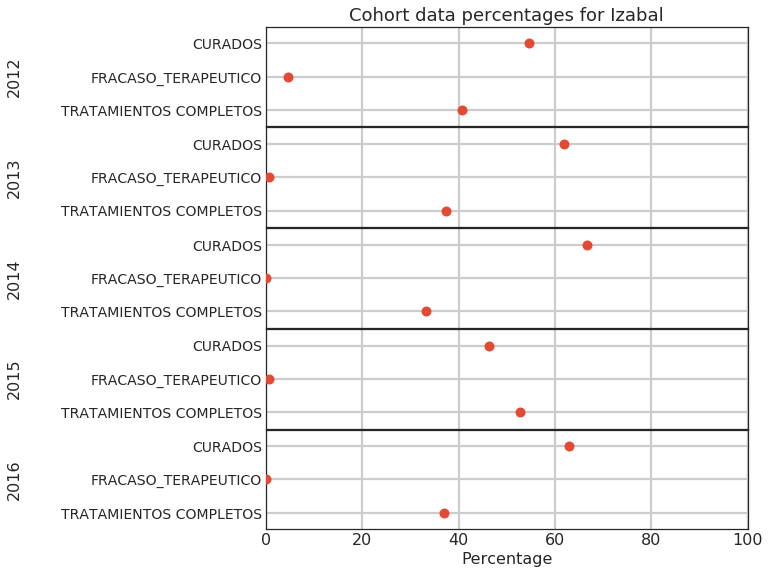

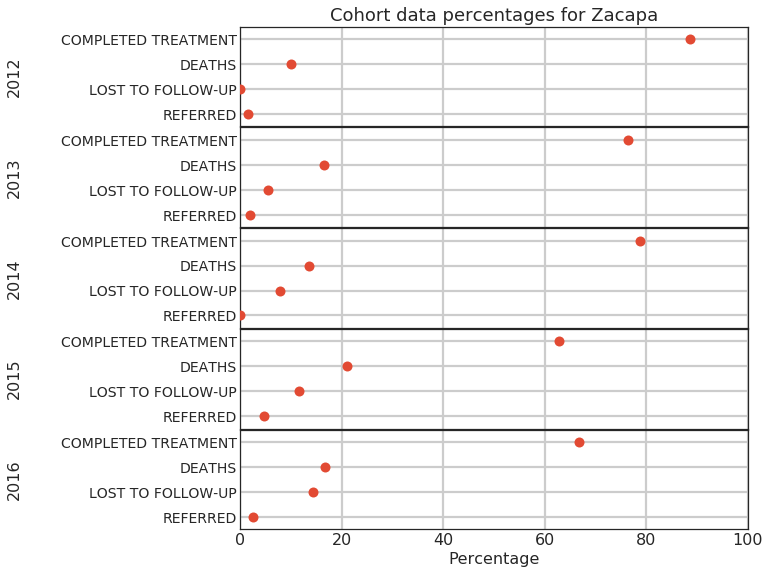

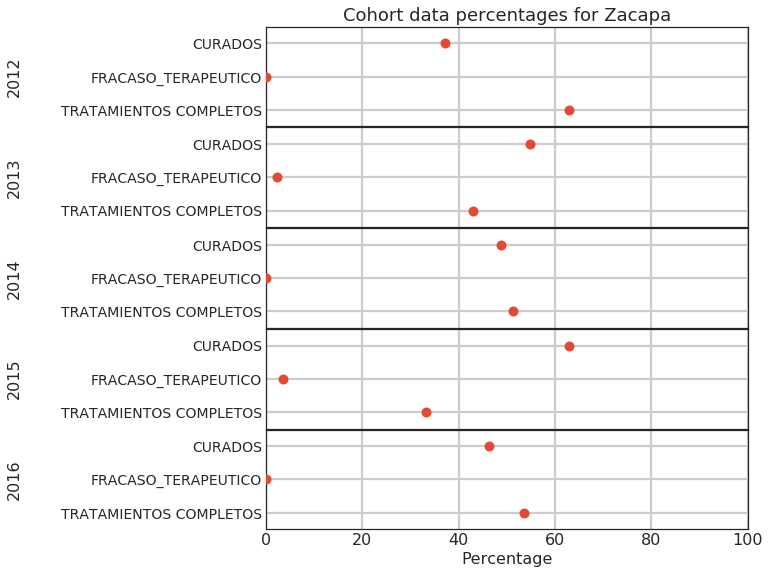

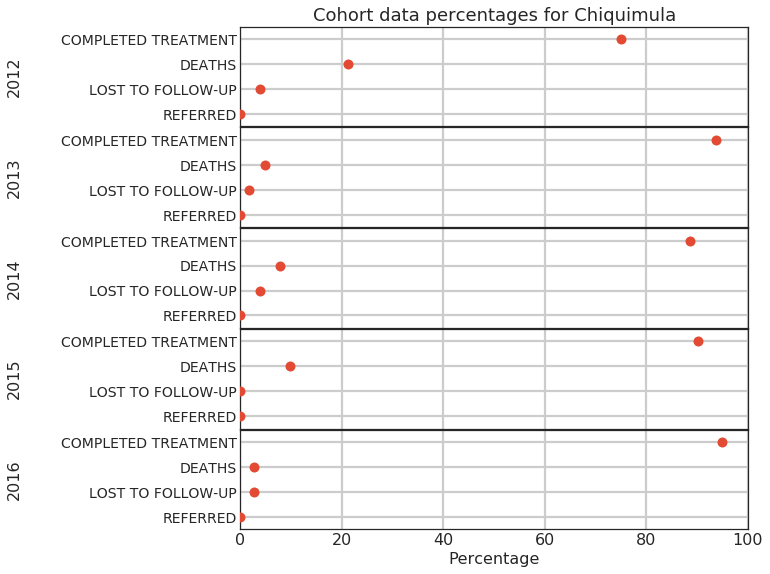

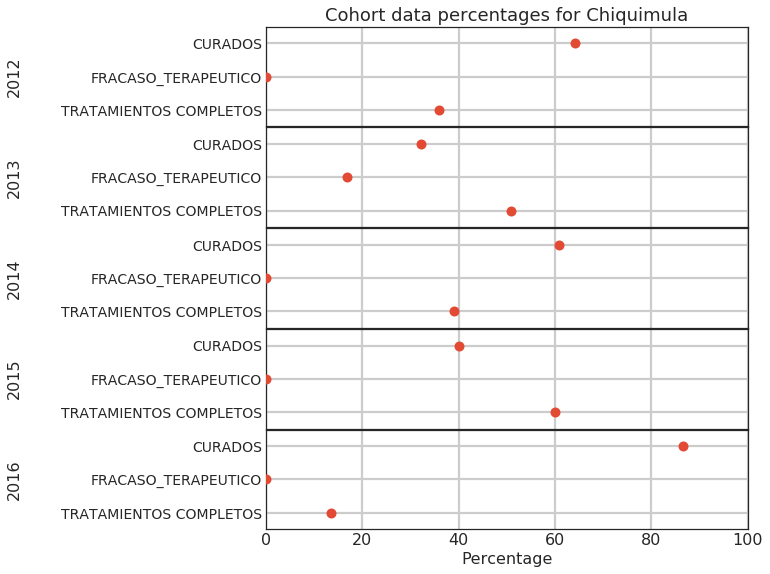

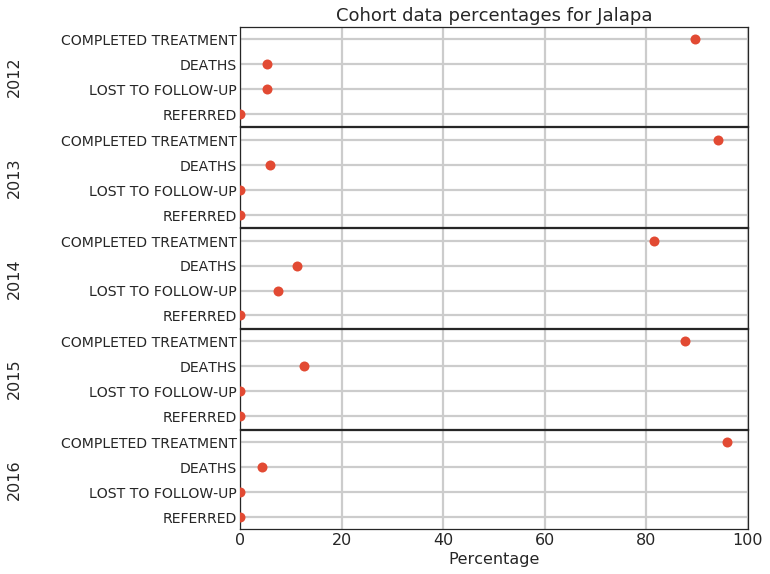

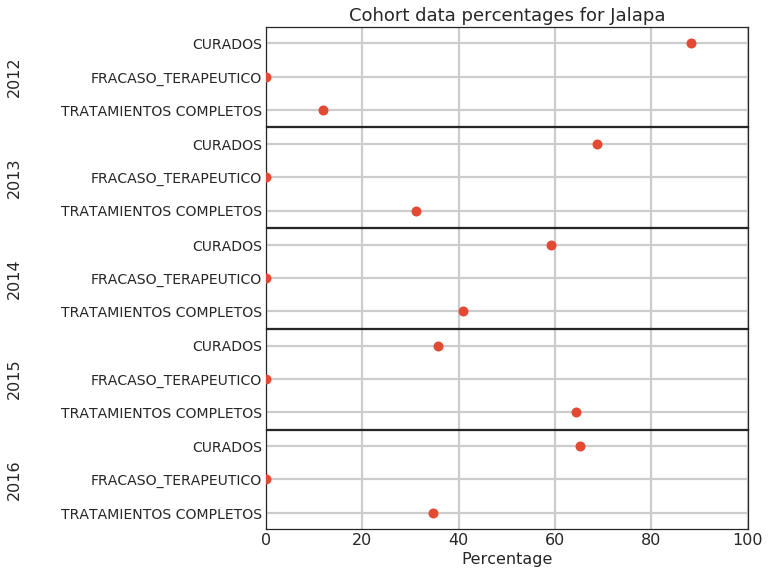

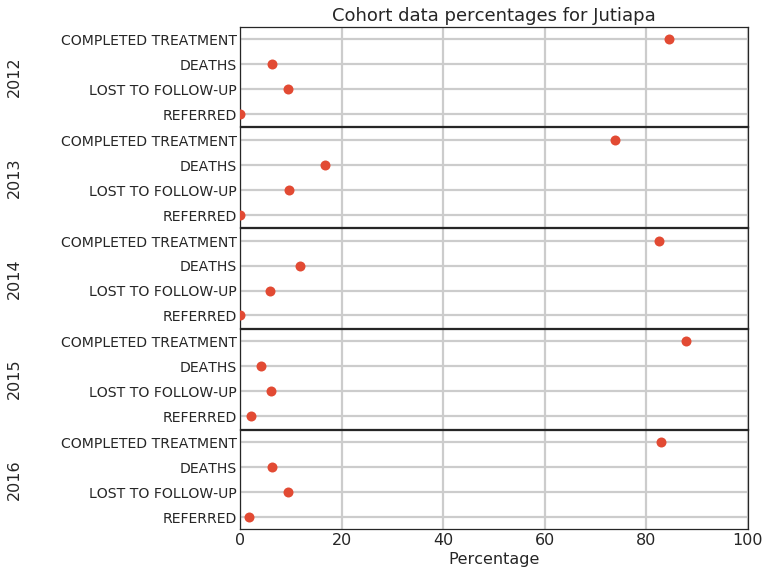

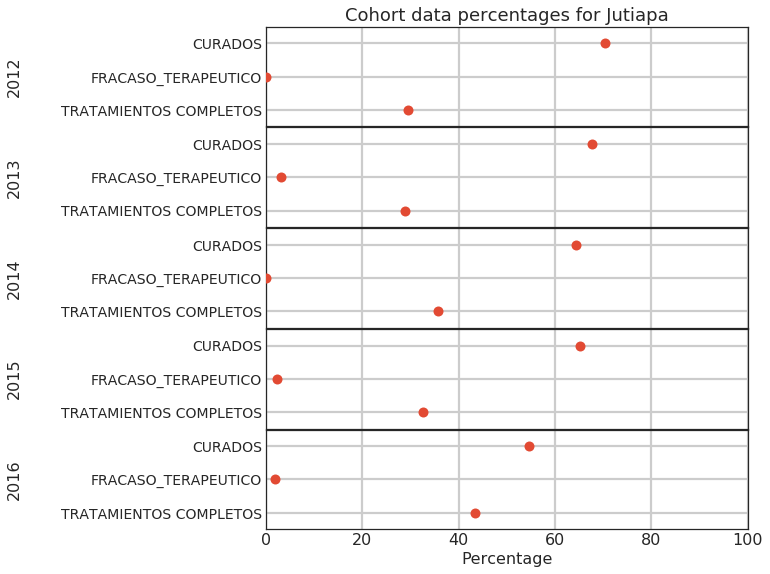

In [130]:
for depto in range(1, 23):
    
    deptoname = deptos.DEPARTAMEN[deptos.CODIGO == (str(depto * 100) if depto > 1 else "101")].values[0]
    print(depto, deptoname)
    grid, output = year_cohort_plot(data_filter = (datadf.deptocode==depto))
    grid.axes[0][0].set_title("Cohort data percentages for " + deptoname)
    with open("../../../../Graficas/TBCohortesDepto/Numbers-" + str(depto) + ".txt", mode = "w") as rawnumbers:
        rawnumbers.write(output)
    grid.savefig("../../../../Graficas/TBCohortesDepto/Figure-"+str(depto)+".png", format =  "png")
    grid, output = year_cohort_plot(groupby="row_name",
                                    data_filter = (datadf.deptocode==depto) & 
                                                  (datadf.row_name_B == "COMPLETED TREATMENT"))
    grid.axes[0][0].set_title("Cohort data percentages for " + deptoname)
    with open("../../../../Graficas/TBCohortesDepto_TxCompletos/Numbers-" + str(depto) + ".txt", mode = "w") as rawnumbers:
        rawnumbers.write(output)
    grid.savefig("../../../../Graficas/TBCohortesDepto_TxCompletos/Figure-"+str(depto)+".png", format =  "png")
plt.ion()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Counts
row_name_B  COMPLETED TREATMENT  DEATHS  LOST TO FOLLOW-UP  REFERRED  total
year                                                                       
2012                      192.0    56.0               18.0       3.0  269.0
2013                      152.0    47.0               25.0       2.0  226.0
2014                      145.0    31.0               22.0       0.0  198.0
2015                      116.0    36.0               21.0       0.0  173.0
2016                      119.0    26.0               17.0       1.0  163.0
Percentages
row_name_B  COMPLETED TREATMENT  DEATHS  LOST TO FOLLOW-UP  REFERRED  total
year                                                                       
2012                       71.4    20.8                6.7       1.1  100.0
2013                       67.3    20.8               11.1       0.9  100.0
2014                       73.2    15.7               11.1       0.0  100.0
2015                       67.1    20.8               12.1       0.0 

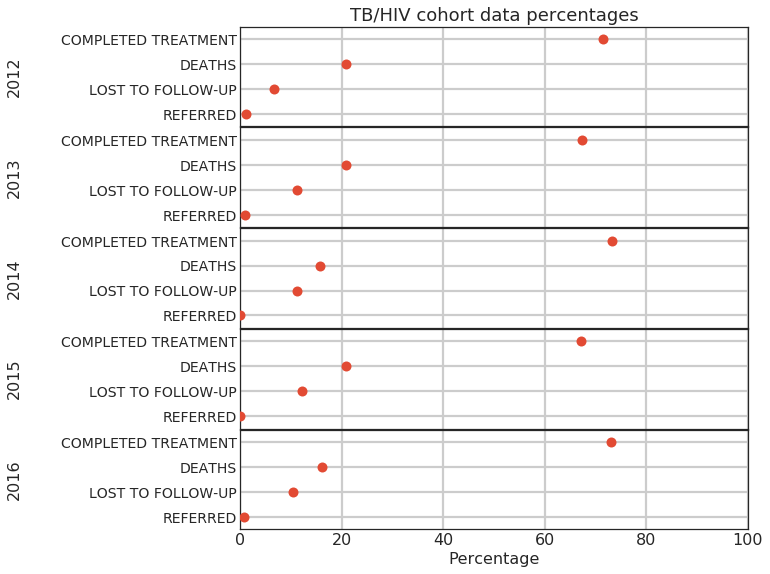

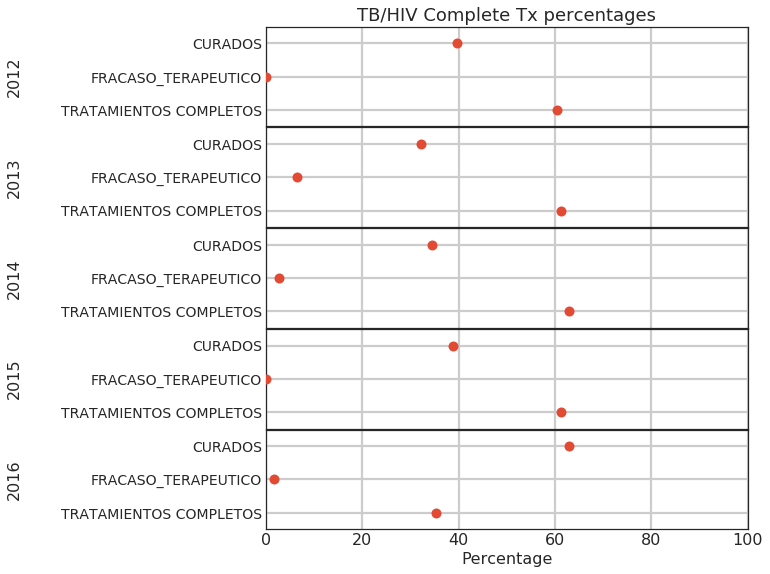

In [135]:
grid, output1 = year_cohort_plot(data_filter = (datadf.deptocode!=0) & (datadf.table == "Nuevos TB/VIH"))
grid.axes[0][0].set_title("TB/HIV cohort data percentages")

grid, output2 = year_cohort_plot(data_filter = (datadf.deptocode!=0) & (datadf.table == "Nuevos TB/VIH") &
                                (datadf.row_name_B == "COMPLETED TREATMENT"),
                               groupby = 'row_name')
grid.axes[0][0].set_title("TB/HIV Complete Tx percentages")

print(output1, "\n", output2)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Counts
row_name_B  COMPLETED TREATMENT  DEATHS  LOST TO FOLLOW-UP  REFERRED   total
year                                                                        
2012                     3068.0   220.0              170.0      28.0  3486.0
2013                     2838.0   232.0              218.0      22.0  3310.0
2014                     2666.0   187.0              220.0       2.0  3075.0
2015                     2856.0   193.0              226.0       8.0  3283.0
2016                     2741.0   192.0              186.0      11.0  3130.0
Percentages
row_name_B  COMPLETED TREATMENT  DEATHS  LOST TO FOLLOW-UP  REFERRED  total
year                                                                       
2012                       88.0     6.3                4.9       0.8  100.0
2013                       85.7     7.0                6.6       0.7  100.0
2014                       86.7     6.1                7.2       0.1  100.0
2015                       87.0     5.9                6.9    

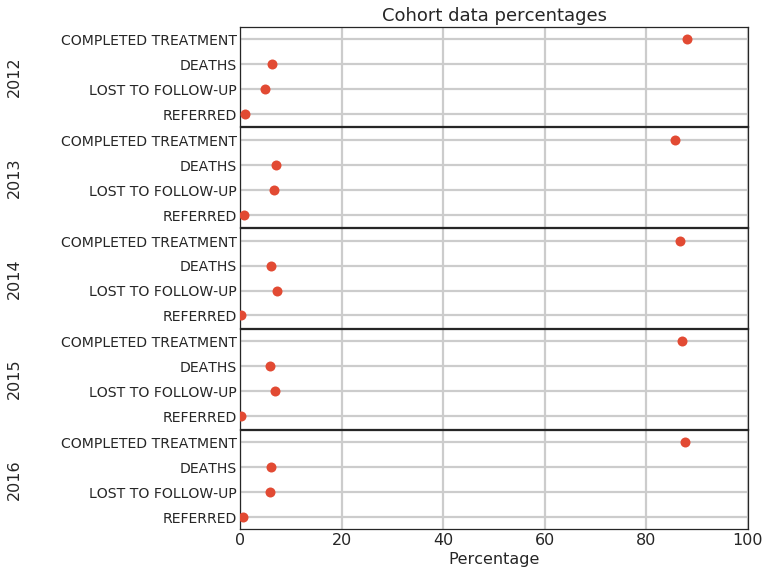

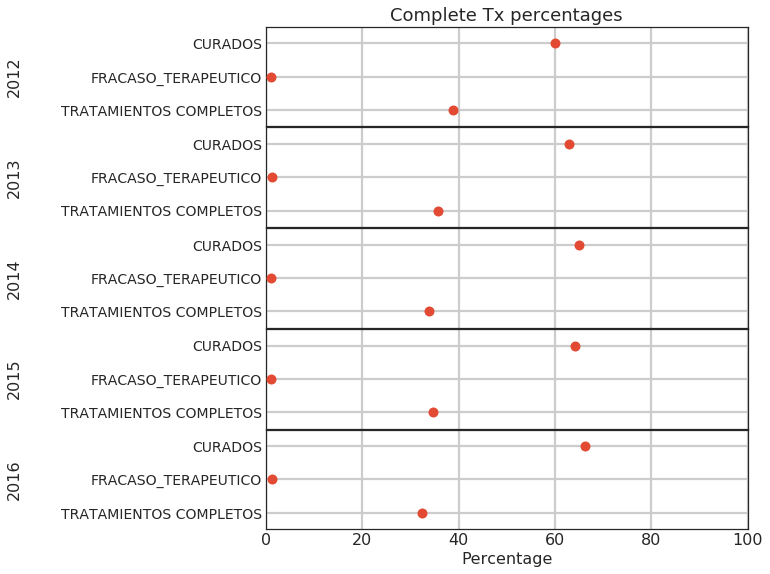

In [137]:
grid, output1 = year_cohort_plot(data_filter = (datadf.deptocode!=0))
grid.axes[0][0].set_title("Cohort data percentages")

grid, output2 = year_cohort_plot(data_filter = (datadf.deptocode!=0)  &
                                (datadf.row_name_B == "COMPLETED TREATMENT"),
                               groupby = 'row_name')
grid.axes[0][0].set_title("Complete Tx percentages")

print(output1, "\n", output2)

table  Nuevos Extrapulmonares  Nuevos Pediatricos  Nuevos Pulmonares BK+  \
year                                                                       
2012                    277.0               393.0                 2155.0   
2013                    287.0               273.0                 2151.0   
2014                    281.0               264.0                 1999.0   
2015                    308.0                 0.0                 2154.0   
2016                    272.0               194.0                 2282.0   

table  Nuevos Pulmonares BK-  Nuevos TB/VIH  Retratamiento   total    coinfp  
year                                                                          
2012                   392.0          269.0          161.0  3647.0  7.375925  
2013                   373.0          226.0          162.0  3472.0  6.509217  
2014                   333.0          198.0          187.0  3262.0  6.069896  
2015                   648.0          173.0          166.0  3449.0  5.015947  
2016                   219.0          163.0          156.0  3286.0  4.960438

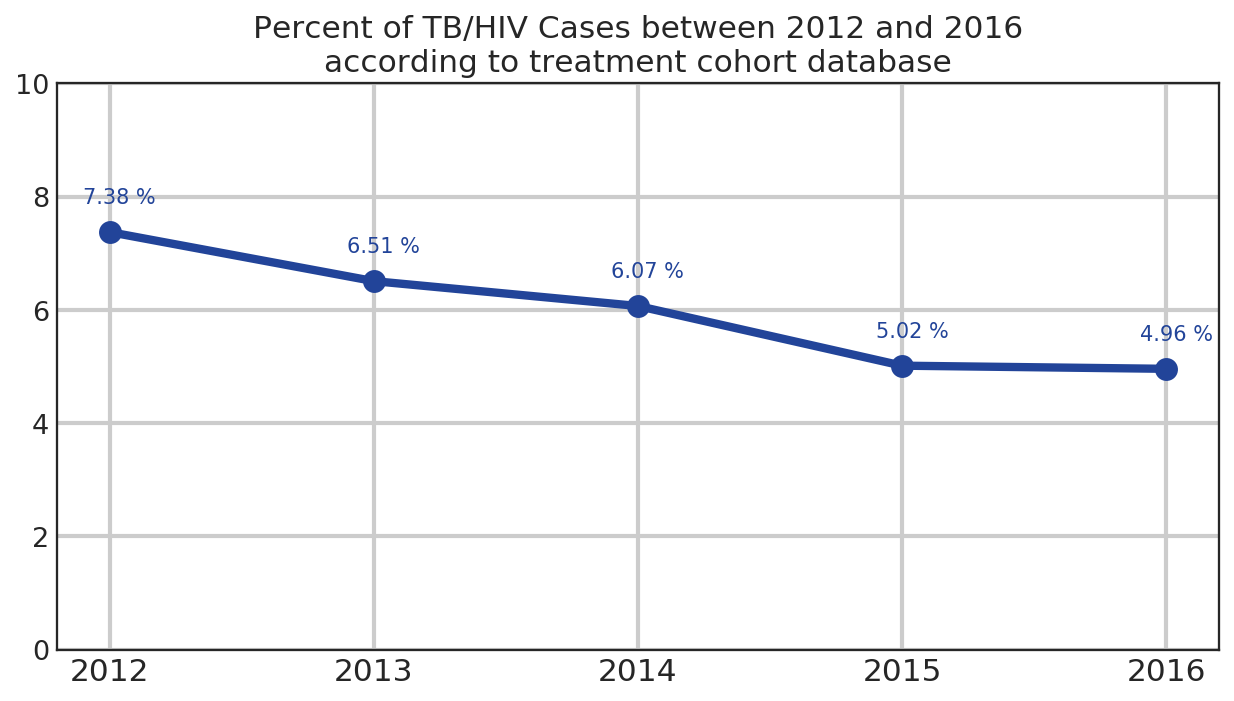

In [101]:
temp = datadf[#(datadf.row_name_.isin(["FALLECIDOS"])) & 
              (datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"
                          ])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "table"]).value.sum().unstack(1).fillna(0)
#temp = \
#    (np.round(temp.divide(temp.total , axis="rows")*100, decimals=0)).astype(int).astype(str) + "%"
temp["total"] = temp.sum(axis=1)
temp["coinfp"] = temp["Nuevos TB/VIH"] / temp.total*100

plt.rcParams["figure.figsize"] = 10,5
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 10
plt.plot(temp.index.astype(str), temp.coinfp, marker="o", color="#224499")
plt.title("Percent of TB/HIV Cases between 2012 and 2016\naccording to treatment cohort database")
i = 0
for ix, row in temp.iterrows():
    plt.text(i-0.1, row.coinfp+0.5, str(round(row.coinfp, 2) ) + " %", color="#224499", fontsize=10)
    i+= 1
plt.ylim(0,10)
temp

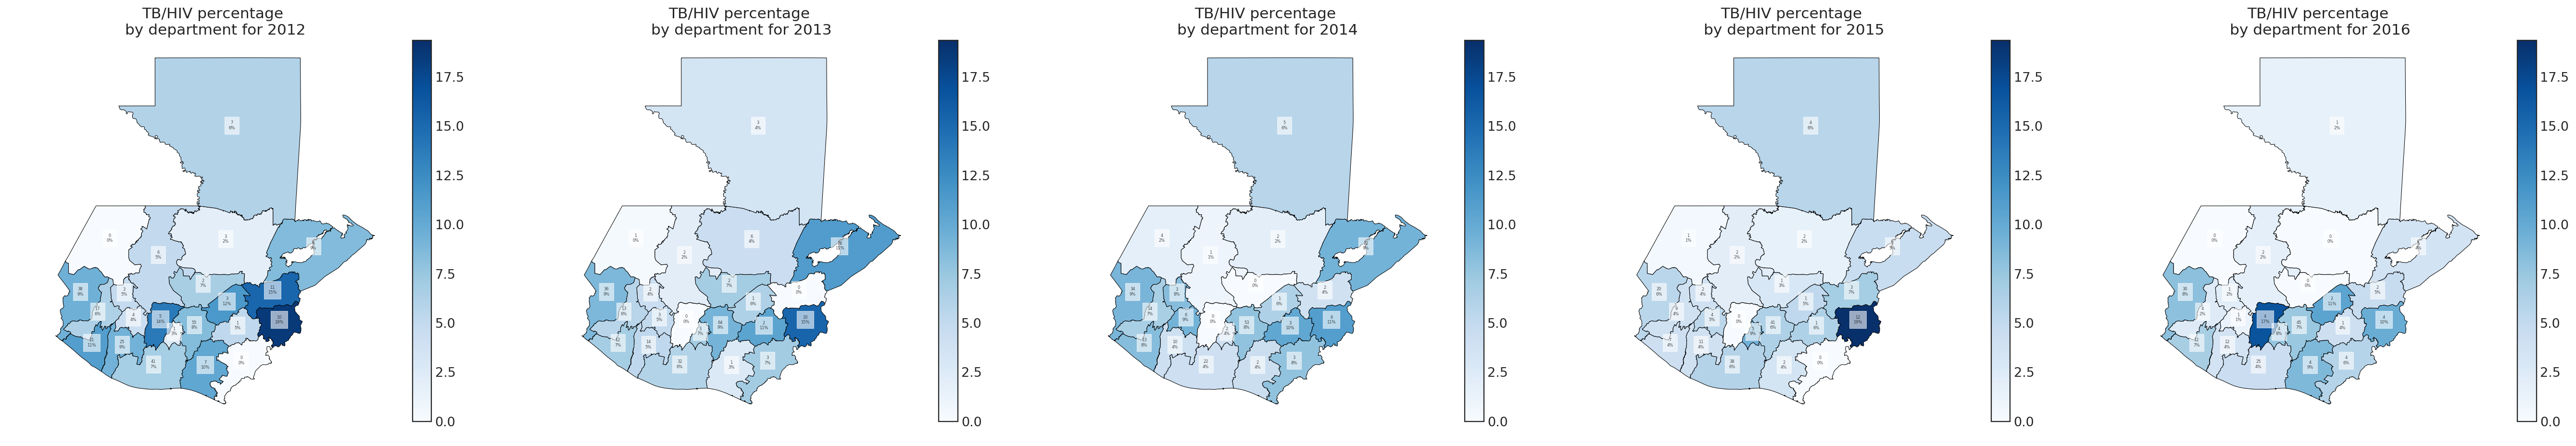

In [114]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                           "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"
                          ])) &
       (datadf.deptocode!=0) & (datadf.year.isin([2012, 2013, 2014, 2015, 2016]))].\
    groupby(["deptocode", "year", "table"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp2 = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=2))
vmax = temp2["Nuevos TB/VIH"].max()
temp2 = temp2.reset_index()

temp2["deptocode"]= (temp2.deptocode * 100).astype(str).apply(lambda x: "101" if x=="100" else x)

side = 7
n = 5
vmin = 0
#vmax = 8
f, axes = plt.subplots(1, n, figsize=(side*n*1.3, side))
i = 2012
for ax in axes:
    temp3 = deptos.merge(temp2[temp2.year == i].reset_index(), 
                 left_on="CODIGO", right_on = "deptocode" ).fillna(0)
    temp3.plot("Nuevos TB/VIH", cmap = "Blues", legend=True, ax= ax, vmin = vmin, vmax = vmax, edgecolor="black")
    ax.axis('off')
    ax.set_title("TB/HIV percentage \nby department for "+ str(i))
    for idx, deptorow in temp3.iterrows():
        ax.annotate(s= str(int(temp[temp.index.map(lambda x: 
                                            (x[1] == i) & 
                                            (x[0] == int(deptorow["CODIGO"][0:-2])) 
                                           )]["Nuevos TB/VIH"].values[0])) + "\n" + 
                    str(round(deptorow["Nuevos TB/VIH"])).replace("nan", "0.0") + "%", 
                 xy=(deptorow.geometry.centroid.x, 
                     deptorow.geometry.centroid.y), 
                horizontalalignment='center', fontsize = 4, alpha = 0.7,
                color = "black", bbox={"color": "white", "alpha":0.6})

    i += 1

In [42]:
[ x for x in datadf.table.unique() if x.find("MDR") != -1 ]

['MDR sensitivity tests on new',
 'MDR confirmed cases from new',
 'MDR test on previously treated',
 'MDR confirmed from previously treated',
 'MDR 2nd line treatment begun',
 'MDR TB/HIV',
 'MDR less than 10 years',
 'MDR less than 14 years']

table  year  MDR 2nd line treatment begun  MDR TB/HIV  \
year                                                    
2012   2012                          39.0         0.0   
2013   2013                          24.0         5.0   
2015   2015                          30.0         0.0   
2016   2016                          27.0         1.0   

table  MDR confirmed cases from new  MDR confirmed from previously treated  \
year                                                                         
2012                           34.0                                   17.0   
2013                           11.0                                   15.0   
2015                           29.0                                   17.0   
2016                           28.0                                   14.0   

table  MDR less than 10 years  MDR less than 14 years  \
year                                                    
2012                      NaN                     0.0   
2013                      NaN                     0.0   
2015                      0.0                     NaN   
2016                      0.0                     NaN   

table  MDR sensitivity tests on new  MDR test on previously treated  \
year                                                                  
2012                           62.0                            67.0   
2013                           67.0                            72.0   
2015                          210.0                            94.0   
2016                          116.0                            65.0   

table  MDR Tests  MDR Cases  MDR Pediatric cases  
year                                              
2012       129.0       51.0                  NaN  
2013       139.0       26.0                  NaN  
2015       304.0       46.0                  NaN  
2016       181.0       42.0                  NaN

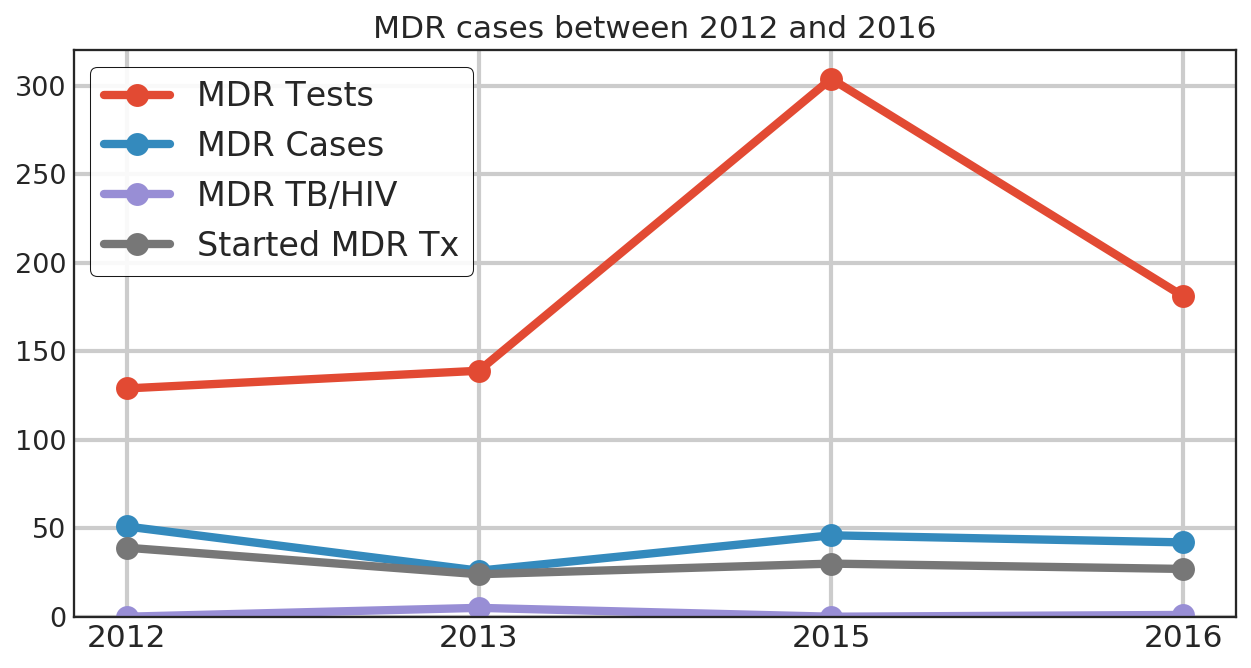

In [57]:
temp = datadf[datadf.table.isin([
    "MDR sensitivity tests on new",
    "MDR test on previously treated",
    "MDR 2nd line treatment begun",
    "MDR TB/HIV", 
    "MDR confirmed from previously treated", 
    "MDR confirmed cases from new", 
    "MDR less than 10 years", 
    "MDR less than 14 years"
    ]) & (datadf.year != 2014) & (datadf.deptocode == 0)].groupby(["year", "table"]).value.sum().unstack(1).reset_index()
plt.rcParams["figure.figsize"] = 10,5
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 10
temp["MDR Tests"] =  temp["MDR test on previously treated"] + temp["MDR sensitivity tests on new"]
temp["MDR Cases"] =  temp["MDR confirmed cases from new"] + temp["MDR confirmed from previously treated"]
temp["MDR Pediatric cases"] = temp["MDR less than 10 years"] + temp["MDR less than 14 years"]
temp.index = temp.year.astype(str)
plt.plot(temp[["MDR Tests", "MDR Cases", "MDR TB/HIV", "MDR 2nd line treatment begun"]], marker="o")
plt.title("MDR cases between 2012 and 2016")
plt.legend(["MDR Tests", "MDR Cases", "MDR TB/HIV", "Started MDR Tx"])
#i = 0
#for ix, row in temp.iterrows():
#    plt.text(i-0.1, row.value+5, str(round(row.value, 2) ) , color="#224499", fontsize=10)
#    i+= 1
plt.ylim(0,320)
temp

(6.066911248721627, 8.556818181818182)

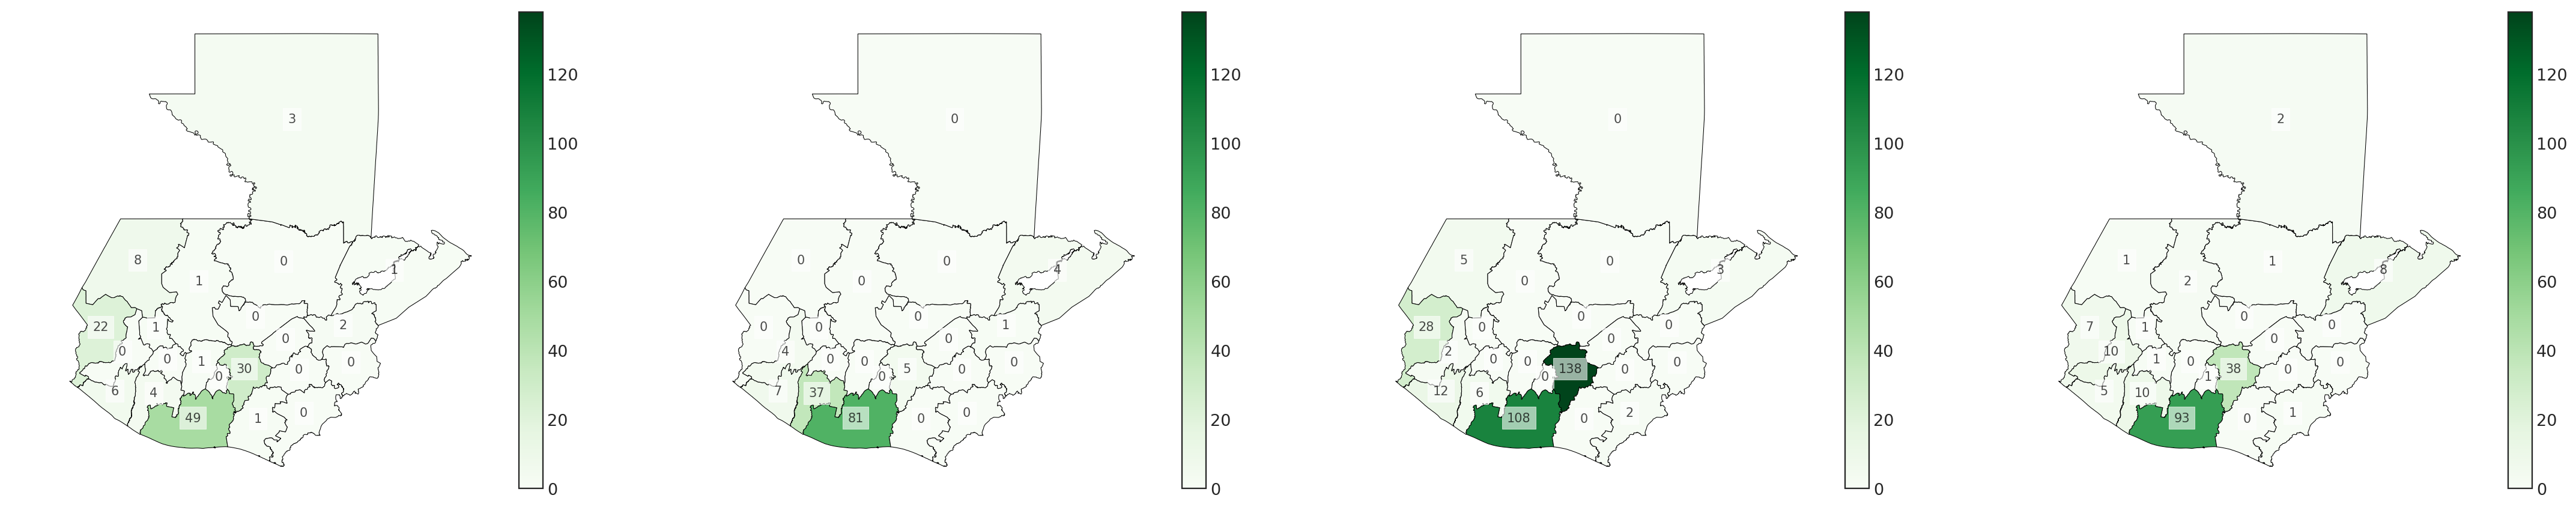

In [66]:
temp = datadf[(datadf.deptocode != 0) & datadf.table.isin([
    "MDR sensitivity tests on new",
    "MDR test on previously treated",
    
    #"MDR 2nd line treatment begun",
    #"MDR confirmed from previously treated", 
    #"MDR confirmed cases from new", 
    ]) & (datadf.year.isin([2012,2013,2015, 2016]))].groupby(["year", "deptocode"]).value.sum()
vmax = temp.max()
temp = temp.reset_index()
temp["deptocode"]= (temp.deptocode * 100).astype(str).apply(lambda x: "101" if x=="100" else x)


if True:
    side = 7
    vmin = 0
    n = 4
    f, axes_ = plt.subplots(1, n, figsize=(side*n*1.3, side))
    i = 2012
    axes = axes_

    for ax in axes:
        if i==2014: 
            i = i+1
        temp3 = deptos.merge(temp[temp.year == i].reset_index(), 
                     left_on="CODIGO", right_on = "deptocode" ).fillna(0)
        temp3.plot("value", cmap = "Greens", legend=True, 
                   ax= ax, vmin = vmin, vmax = vmax, edgecolor="black")
        ax.axis('off')
        #ax.set_title("TB MDR cases \nby department for "+ str(i))
        for idx, deptorow in temp3.iterrows():
            ax.annotate(s= str(int(deptorow.value)), 
                     xy=(deptorow.geometry.centroid.x, 
                         deptorow.geometry.centroid.y), 
                    horizontalalignment='center', fontsize = 10, alpha = 0.7,
                    color = "black", bbox={"color": "white", "alpha":0.6})

        i += 1
temp.groupby("deptocode").value.std().mean(), temp.value.mean()

In [23]:
# Lets start with the missing basic data for pediatric and extrapulmonares cases: 
temp = datadf[#(datadf.row_name_.isin(["FALLECIDOS"])) & 
              (datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
                          "Nuevos Extrapulmonares", "Nuevos TB/VIH", "Retratamiento"
                          ])) &
       (datadf.deptocode!=0)].\
    groupby(["year", "row_name"]).value.sum().unstack(1)
#temp["total"] = temp.sum(axis=1)
#temp = temp.fillna(0)
#temp = \
#    (np.round(temp.divide(temp.total , axis="rows")*100, decimals=0)).astype(int).astype(str) + "%"
temp["total"] = temp.sum(axis=1)
temp["fatr"] = temp.FALLECIDOS / temp.total*100

Text(0.5,0,'')

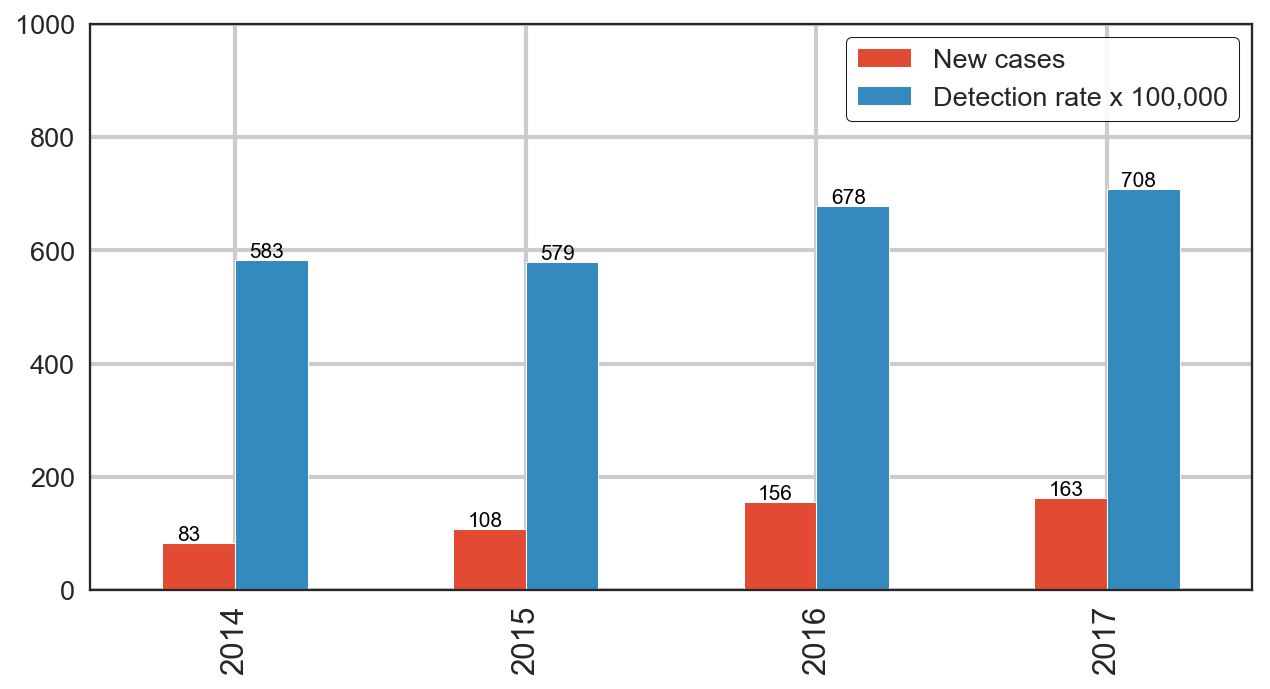

In [6]:
from io import StringIO

bf = StringIO("""year, new, incidence
2014, 83, 583
2015, 108, 579
2016, 156, 678
2017, 163, 708""")

plt.rcParams["figure.figsize"] = (10,5)
temp = pd.read_csv(bf).round(1)
temp.set_index("year").plot.bar()
plt.legend(["New cases", "Detection rate x 100,000"], fontsize=13)
c = 0
for i, row in temp.iterrows():
    plt.annotate(str(row.values[1]), [c-0.2, row.values[1]+5], color= "black")
    plt.annotate(str(row.values[2]), [c+0.05, row.values[2]+5], color= "black", )
    c += 1
plt.ylim(0,1000)
plt.xlabel("")
#plt.title("PPL Incidence and notification cases")

Text(0.5,0,'Year')

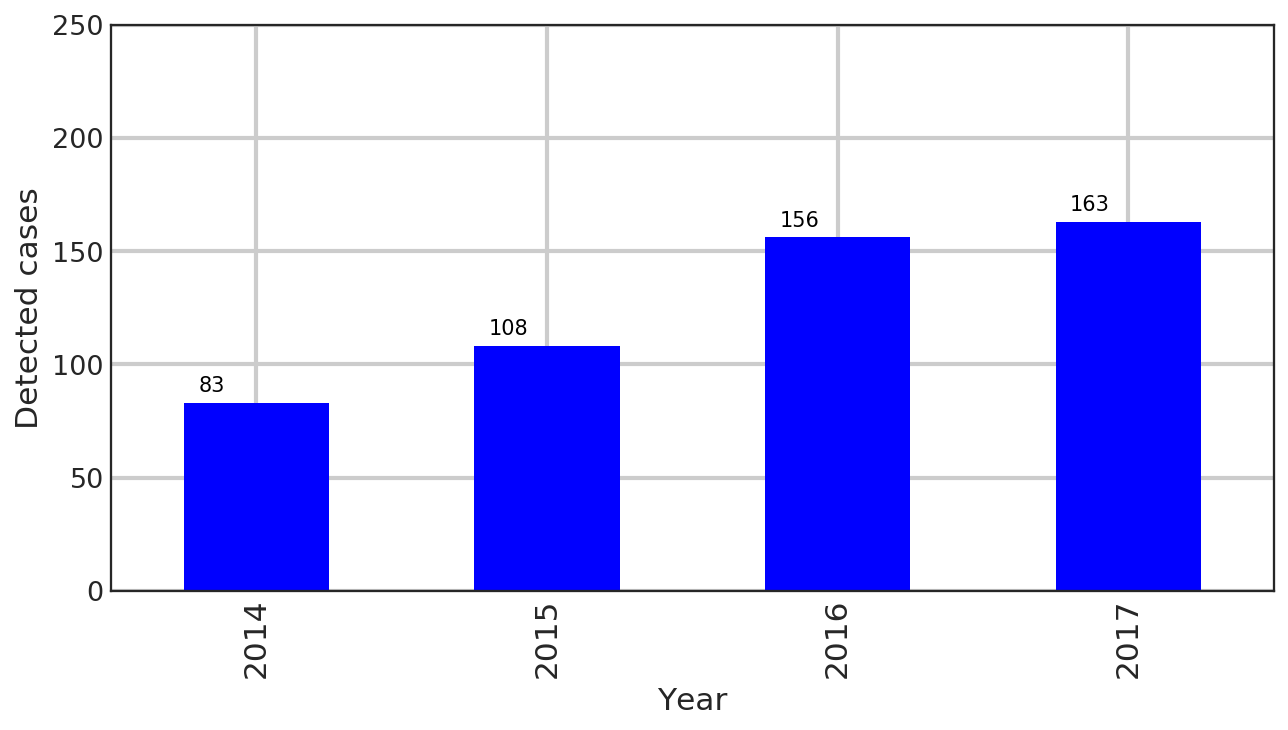

In [23]:
from io import StringIO

bf = StringIO("""year, new
2014, 83
2015, 108
2016, 156
2017, 163""")

plt.rcParams["figure.figsize"] = (10,5)
temp = pd.read_csv(bf).round(1)
temp.set_index("year").plot.bar(color = "blue")
plt.legend().remove()
plt.ylabel("Detected cases")
c = 0
for i, row in temp.iterrows():
    plt.annotate(str(row.values[1]), [c-0.2, row.values[1]+5], color= "black")
    c += 1
plt.ylim(0,250)
plt.xlabel("Year")
#plt.title("PPL Incidence and notification cases")

(0, 10)

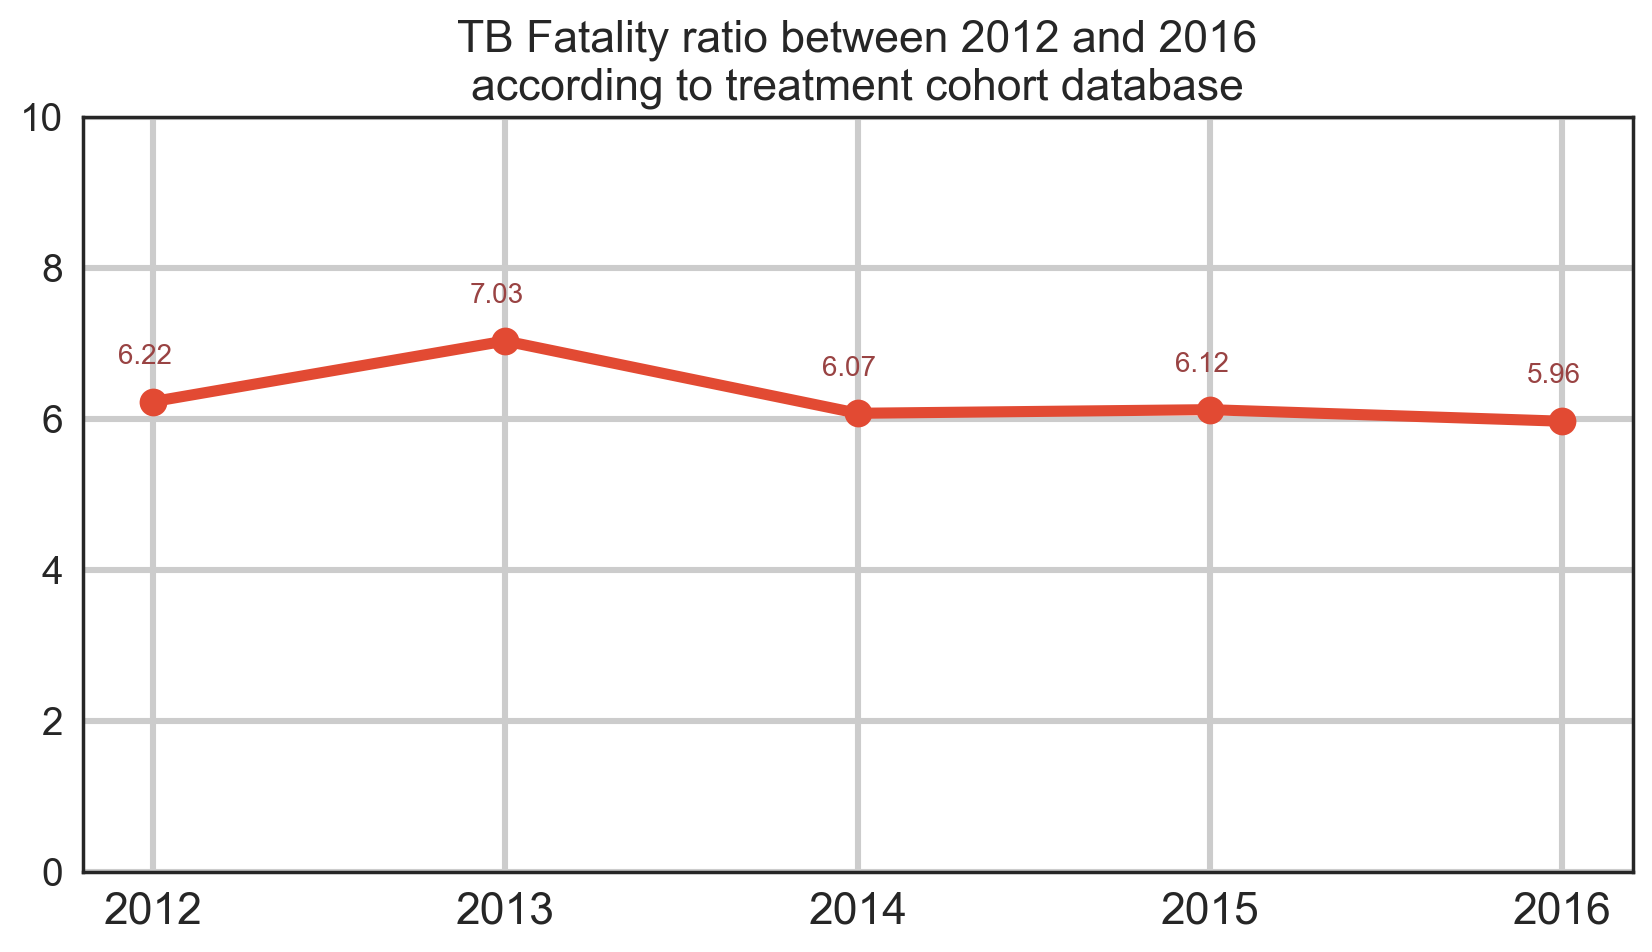

In [62]:
plt.rcParams["figure.figsize"] = 10,5
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.markersize"] = 10
plt.plot(temp.index.astype(str), temp.fatr, marker="o")
plt.title("TB Fatality ratio between 2012 and 2016\naccording to treatment cohort database")
i = 0
for ix, row in temp.iterrows():
    plt.text(i-0.1, row.fatr+0.5, str(round(row.fatr, 2) ), color="#994343", fontsize=10)
    i+= 1
plt.ylim(0,10)

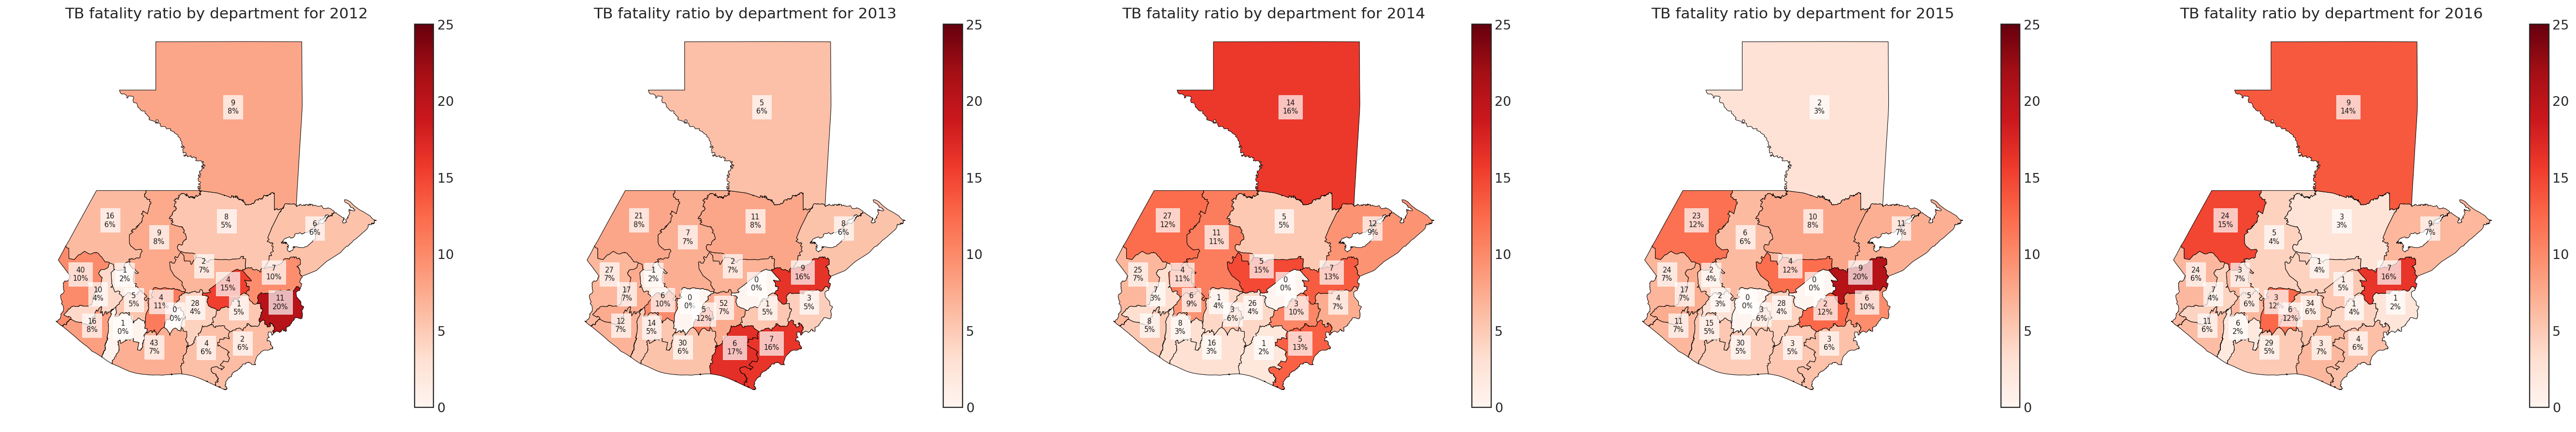

In [157]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([
           "Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
           "Nuevos Extrapulmonares", 
           "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0) & (datadf.year.isin([2012, 2013, 2014, 2015, 2016]))].\
    groupby(["deptocode", "year", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp2 = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=2)).reset_index()

temp2["deptocode"]= (temp2.deptocode * 100).astype(str).apply(lambda x: "101" if x=="100" else x)
#temp = temp.stack().reset_index()[lambda x: x["row_name_"] != "total"]

side = 7
n = 5
vmin = 0
vmax = 25
f, axes = plt.subplots(1, n, figsize=(side*n*1.3, side))
i = 2012
for ax in axes:
    temp3 = deptos.merge(temp2[temp2.year == i].reset_index(), 
                 left_on="CODIGO", right_on = "deptocode" )
    temp3.plot("DEATHS", cmap = "Reds", legend=True, ax= ax, vmin = vmin, vmax = vmax, edgecolor="black")
    ax.axis('off')
    ax.set_title("TB fatality ratio by department for "+ str(i))
    for idx, deptorow in temp3.iterrows():
        ax.annotate(s= str(int(temp[temp.index.map(lambda x: 
                                            (x[1] == i) & 
                                            (x[0] == int(deptorow["CODIGO"][0:-2])) 
                                           )].DEATHS.values[0])) + "\n" + 
                    str(round(deptorow["DEATHS"])).replace("nan", "0.0") + "%", 
                 xy=(deptorow.geometry.centroid.x, 
                     deptorow.geometry.centroid.y), 
                horizontalalignment='center', fontsize = 7, alpha = 0.9,
                color = "black", bbox={"color": "white", "alpha":0.7})

    i += 1

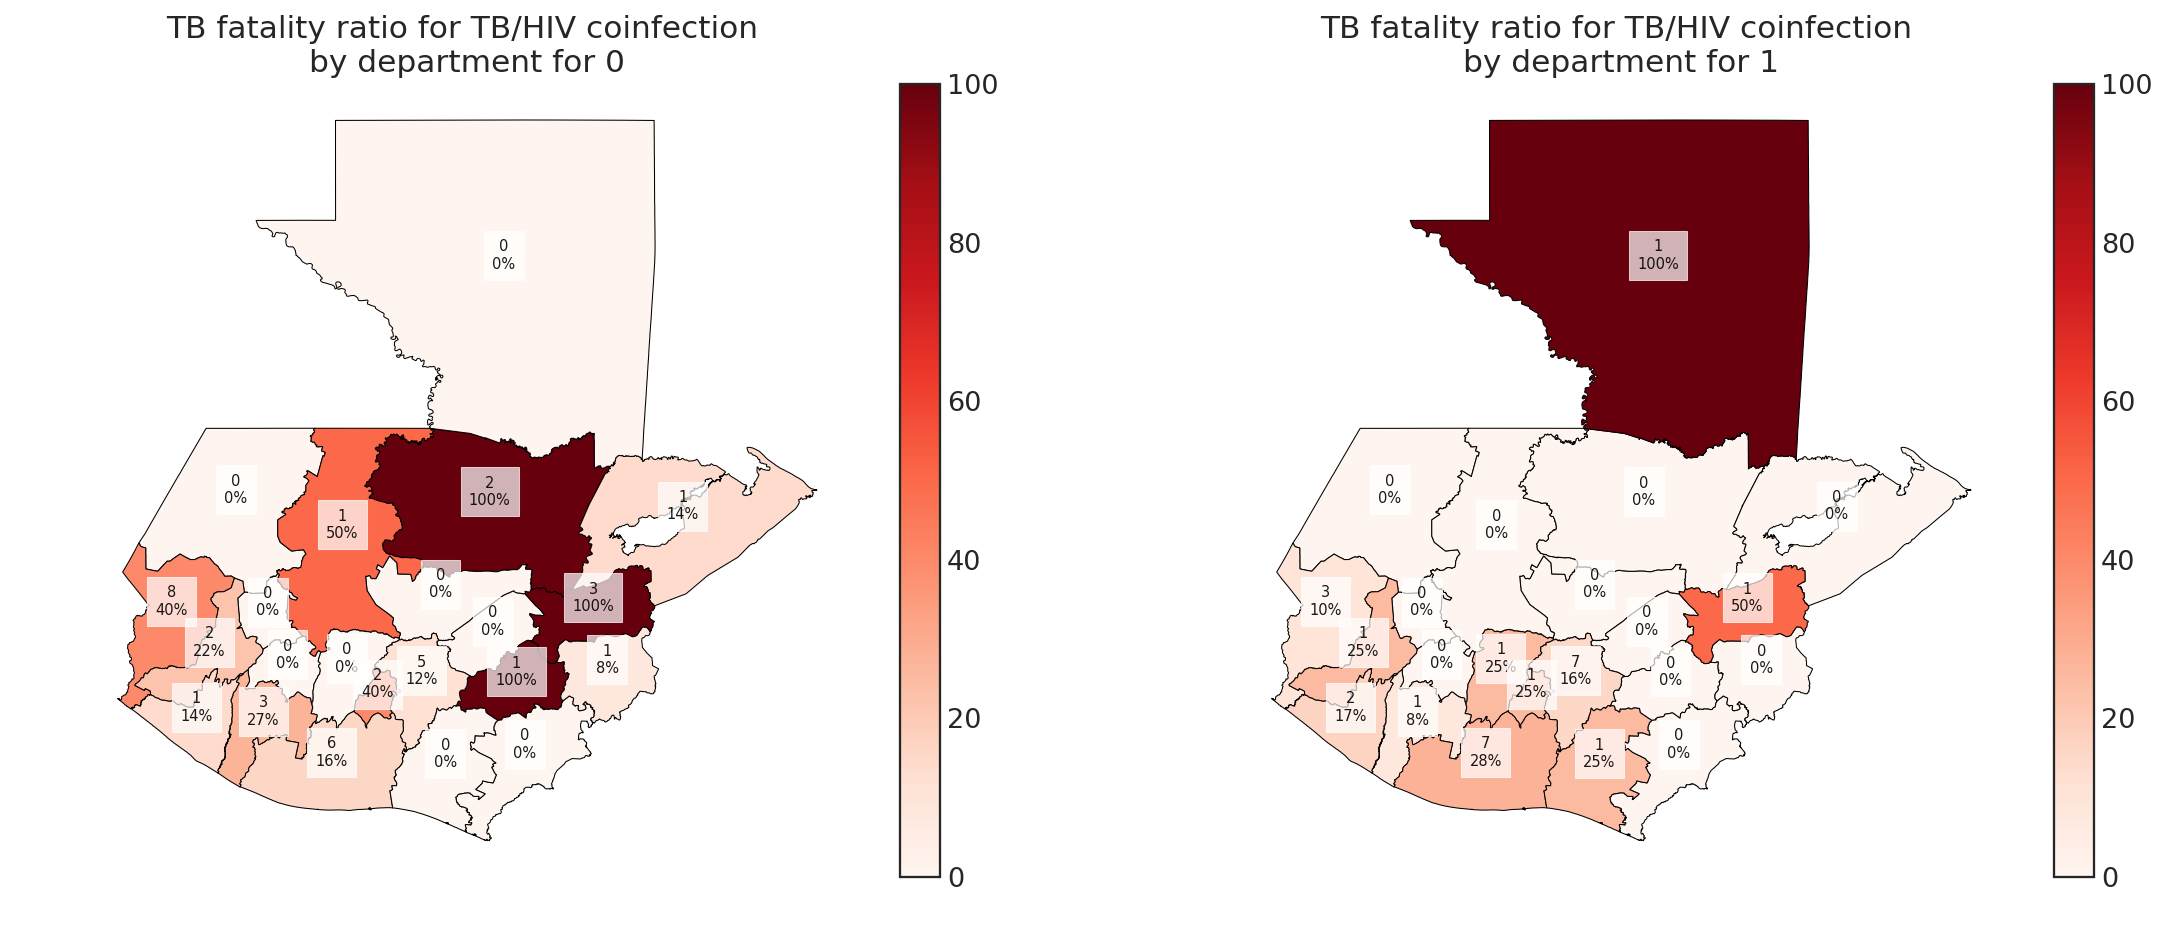

In [155]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([
           "Nuevos TB/VIH"])) &
       (datadf.deptocode!=0) & (datadf.year.isin([#2012, 2013, 2014, 
                                                  2015, 2016]))].\
    groupby(["deptocode", "year", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp2 = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=2)).reset_index()

temp2["deptocode"]= (temp2.deptocode * 100).astype(str).apply(lambda x: "101" if x=="100" else x)
#temp = temp.stack().reset_index()[lambda x: x["row_name_"] != "total"]

side = 7
years = temp2.year.unique()
n = len(years)
vmin = 0
vmax = 100
f, axes = plt.subplots(1, n, figsize=(side*n*1.3, side))
i = 0
for ax in axes:
    temp3 = deptos.merge(temp2[temp2.year == years[i]].reset_index(), 
                 left_on="CODIGO", right_on = "deptocode" ).fillna(0)
    temp3.plot("DEATHS", cmap = "Reds", legend=True, ax= ax, vmin = vmin, vmax = vmax, edgecolor="black")
    ax.axis('off')
    ax.set_title("TB fatality ratio for TB/HIV coinfection \nby department for "+ str(i))
    for idx, deptorow in temp3.iterrows():
        ax.annotate(s= str(int(temp[temp.index.map(lambda x: 
                                            (x[1] == years[i]) & 
                                            (x[0] == int(deptorow["CODIGO"][0:-2])) 
                                           )].DEATHS.values[0])) + "\n" + 
                    str(round(deptorow["DEATHS"])).replace("nan", "0.0") + "%", 
                 xy=(deptorow.geometry.centroid.x, 
                     deptorow.geometry.centroid.y), 
                horizontalalignment='center', fontsize = 7, alpha = 0.9,
                color = "black", bbox={"color": "white", "alpha":0.7})

    i += 1

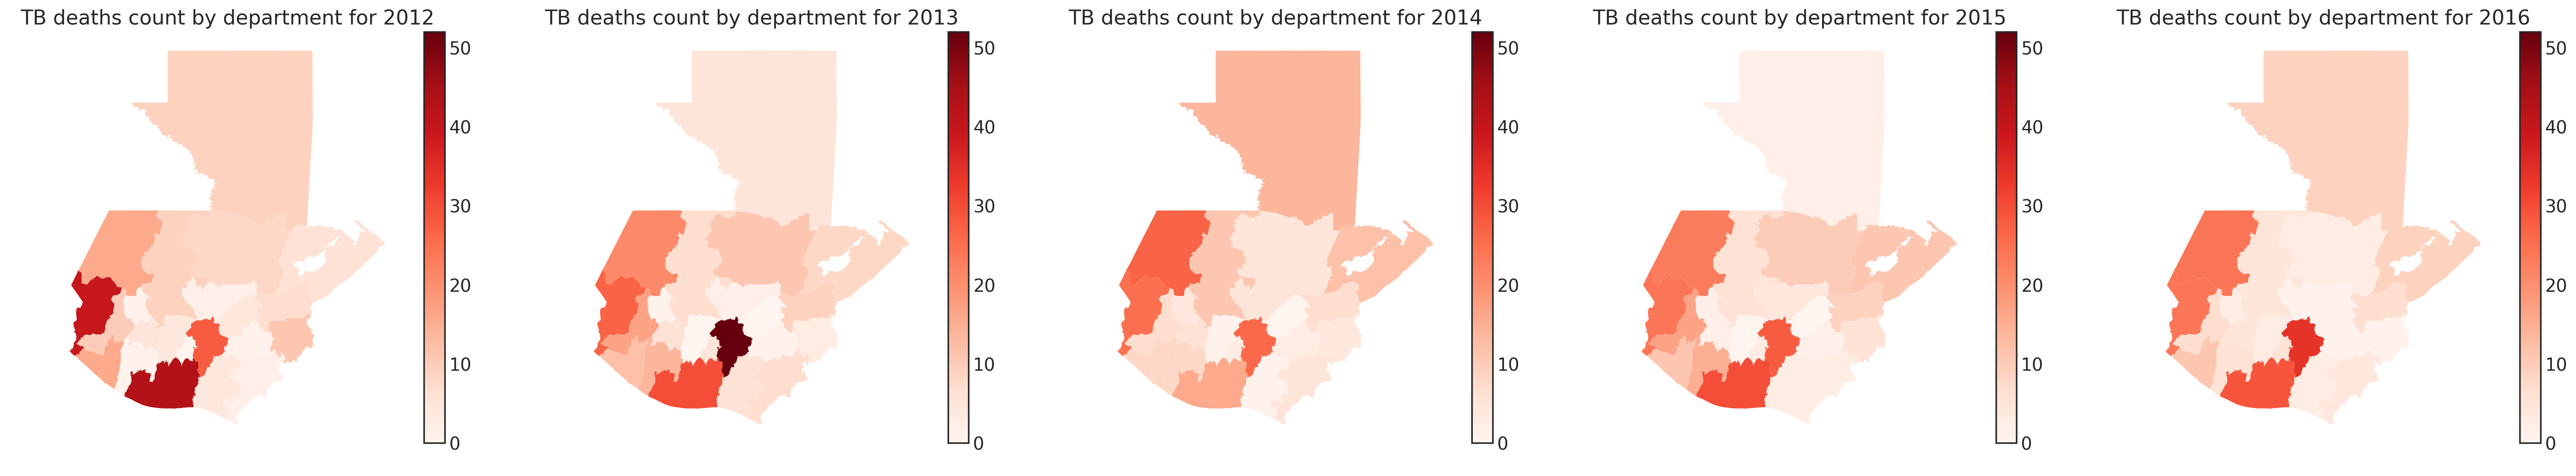

In [18]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([
           "Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
           "Nuevos Extrapulmonares", 
           "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0) & (datadf.year.isin([2012, 2013, 2014, 2015, 2016]))].\
    groupby(["deptocode", "year", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)

temp = temp.reset_index()
temp["deptocode"]= (temp.deptocode * 100).astype(str).apply(lambda x: "101" if x=="100" else x)

side = 6
n = 5
vmin = 0
vmax = temp.DEATHS.max()
f, axes = plt.subplots(1, n, figsize=(side*n*1.2, side))
i = 2012
for ax in axes:
    temp3 = deptos.merge(temp[temp.year == i].reset_index(), 
                 left_on="CODIGO", right_on = "deptocode" )
    temp3.plot("DEATHS", cmap = "Reds", legend=True, ax= ax, vmin = vmin, vmax = vmax)
    ax.axis('off')
    ax.set_title("TB deaths count by department for "+ str(i))
    i += 1

In [14]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([
           "Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
           "Nuevos Extrapulmonares", 
           "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0) & (datadf.year.isin([2012, 2013, 2014, 2015, 2016]))].\
    groupby(["deptocode", "year", "row_name_B"]).value.sum().unstack(2)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp2 = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=2)).reset_index()
temp2["deptocode"]= (temp2.deptocode * 100).astype(str).apply(lambda x: "101" if x=="100" else x)

temp2 = deptos.merge(temp2[temp2.year == 2016].reset_index(), 
                 left_on="CODIGO", right_on = "deptocode" )

In [17]:
temp2[["CODIGO", "DEPARTAMEN", "COMPLETED TREATMENT", "DEATHS", "LOST TO FOLLOW-UP"]].to_csv("./Gt TB deptos ratios 2016.csv")

In [ ]:
temp = datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin([
           "Nuevos Pulmonares BK+", "Nuevos Pulmonares BK-", "Nuevos Pediatricos", 
           "Nuevos Extrapulmonares", 
           "Nuevos TB/VIH", "Retratamiento"])) &
       (datadf.deptocode!=0) & (datadf.year.isin([2012, 2013, 2014, 2015, 2016]))].\
    groupby(["deptocode", "year", "table", "row_name_B"]).value.sum().unstack(3)
temp["total"] = temp.sum(axis=1)
temp = temp.fillna(0)
temp2 = \
    (np.round(temp.divide(temp["total"] , axis="rows")*100, decimals=2))
temp2 = temp2.reset_index()
vmaxs = dict(temp2.groupby("table").DEATHS.max())
rows_names = temp2.table.unique()
temp2["deptocode"] = (temp2.deptocode * 100).astype(str).apply(lambda x: "101" if x=="100" else x)
#temp = temp.stack().reset_index()[lambda x: x["row_name_"] != "total"]

side = 6.5
ncols = 5
nrows = 6
vmin = 0
#vmax = 
plt.rcParams["figure.figsize"] = (side*ncols*1.2,side*nrows)
f, axes = plt.subplots(nrows, ncols, figsize=(side*ncols*1.2,side*nrows), )
for row in range(0, nrows): 
    i = 2012
    for col in range(0, ncols):
        ax = axes[row][col]
        ax.set_title("TB " + rows_names[row] + " for "+ str(i) + "\n Deaths = " + 
                    str(temp[temp.index.map(lambda x: (x[1] == i) & (x[2] == rows_names[row]))].DEATHS.sum()) +
                    " / N = " + 
                    str(temp[temp.index.map(lambda x: (x[1] == i) & (x[2] == rows_names[row]))].total.sum())
                    )
        ax.axis('off')
        temp3 = deptos.merge(temp2[(temp2.table == rows_names[row]) &(temp2.year == i)].reset_index(), 
                     left_on="CODIGO", right_on = "deptocode" )

        if (vmaxs[rows_names[row]] > 0) & (len(temp3) > 0):
            temp3.plot("DEATHS", cmap = "Reds", legend=True, ax= ax, vmin = vmin, vmax = vmaxs[rows_names[row]])
            for idx, deptorow in temp3.iterrows():
                ax.annotate(s= str(int(temp[temp.index.map(lambda x: 
                                                        (x[1] == i) & 
                                                        (x[2] == rows_names[row]) &
                                                        (x[0] == int(deptorow["CODIGO"][0:-2])) 
                                                       )].DEATHS.values[0])) + "\n" + 
                                str(deptorow["DEATHS"]).replace("nan", "0") + "%", 
                             xy=(deptorow.geometry.centroid.x, 
                                 deptorow.geometry.centroid.y), 
                            horizontalalignment='center', fontsize = 6, alpha = 0.7,
                            color = "black", bbox={"color": "white", "alpha":0.6})
        else: 
            print("Found 0 cases in ", i, rows_names[row])
        print(row, col)
        i += 1
f.tight_layout()

In [58]:
datadf[(datadf.col_name.isin(["TOTAL"])) & 
       (datadf.table.isin(["Nuevos Pulmonares BK+"
                          ])) &
       (datadf.deptocode.isin([9,12,1,10,19,5,11,18]))].\
    groupby(["year"]).value.sum()

year
2012    1488.0
2013    1525.0
2014    1424.0
2015    1546.0
2016    1658.0
Name: value, dtype: float64

5